# **Dataset Description** 📃
Dataset source: [UCI](https://archive.ics.uci.edu/ml/datasets/AI4I+2020+Predictive+Maintenance+Dataset)

<h3>About Dataset 📁</h3> 

<img src = "https://cdn-icons-png.flaticon.com/512/2162/2162407.png" width = 100, height = 100>

This synthetic dataset is modeled after an existing ***milling machine*** and consists of **10,000 data points** stored as rows with **14 features** in columns:



1. `UID`: unique identifier ranging from 1 to 10000.
2. `product ID`: consisting of a letter L, M, or H for low (50% of all products), medium (30%) and high (20%) as product quality variants and a variant-specific serial number.
3. `type`: just the product type L, M or H from column 2.
4. `air temperature` [K]: generated using a random walk process later normalized to a standard deviation of 2 K around 300 K.
5. `process temperature` [K]: generated using a random walk process normalized to a standard deviation of 1 K, added to the air temperature plus 10 K.

for more information about random walk process used in `air temperature`, and `process temperature`, check [this link](https://machinelearningmastery.com/gentle-introduction-random-walk-times-series-forecasting-python/).

6. `rotational speed` [rpm]: calculated from a power of 2860 W, overlaid with a normally distributed noise.
7. `torque` [Nm]: torque values are normally distributed around 40 Nm with a SD = 10 Nm and no negative values.
8.` tool wear` [min]: (breakdown and gradual failure of a cutting tool due to regular operation) The quality variants H/M/L add 5/3/2 minutes of tool wear to the used tool in the process.
9. a '`machine failure`' label that indicates, whether the machine has failed in this particular datapoint for any of the following failure modes are true.
The machine failure consists of five independent failure modes:


> **Tool wear failure** (`TWF`): the tool will be replaced of fail at a randomly selected tool wear time between 200 - 240 mins (120 times in our dataset). At this point in time, the tool is replaced 69 times, and fails 51 times (randomly assigned).

> **Heat dissipation failure** (`HDF`): heat dissipation causes a process failure, if the difference between air and process temperature is below 8.6 K and the tools rotational speed is below 1380 rpm. This is the case for 115 data points.

> **Power failure** (`PWF`): the product of torque and rotational speed (in rad/s) equals the power required for the process. If this power is below 3500 W or above 9000 W, the process fails, which is the case 95 times in our dataset.

> **Overstrain failure** (`OSF`): if the product of tool wear and torque exceeds 11,000 minNm for the L product variant (12,000 M, 13,000 H), the process fails due to overstrain. This is true for 98 datapoints.

> **Random failures** (`RNF`): each process has a chance of 0,1 % to fail regardless of its process parameters. This is the case for only 5 datapoints, less than could be expected for 10,000 datapoints in our dataset.



If at least one of the above failure modes is true, the process fails and the 'machine failure' label is set to 1. It is therefore not transparent to the machine learning method, which of the failure modes has caused the process to fail.

This dataset is part of the following publication:
S. Matzka, "Explainable Artificial Intelligence for Predictive Maintenance Applications," 2020 Third International Conference on Artificial Intelligence for Industries (AI4I), 2020, pp. 69-74:.

**Acronyms:**

* [K]: kelvin
* [rpm]: revolutions per minute
* [Nm]: newton-meter
* [min]: minutes


---

# **Getting started** ⏭


## **Install and import the required libraries** ⏬

In [2]:
# import the required libraries
import pandas as pd
import ydata_profiling as pdpf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Load the dataset** 💽

In [3]:
# load the dataset
dataset_path = 'ai4i2020.csv'
df = pd.read_csv(dataset_path)

In [4]:
# total number of rows and columns
print(f"Number of rows: {df.shape[0]}, Number of columns: {df.shape[1]}")

Number of rows: 10000, Number of columns: 14


In [5]:
df.head(3)

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1551         42.8                0                0    0   
1                    1408         46.3                3                0    0   
2                    1498         49.4                5                0    0   

   HDF  PWF  OSF  RNF  
0    0    0    0    0  
1    0    0    0    0  
2    0    0    0    0

# **Data Preparation** ⚙️

## **Exploratory data analysis** 🔍

In [6]:
# rename dataset columns
df.rename(columns = {'Air temperature [K]':'Air temperature',
                     'Process temperature [K]':'Process temperature',
                     'Rotational speed [rpm]':'Rotational speed',
                     'Torque [Nm]':'Torque',
                     'Tool wear [min]':'Tool wear'},
          inplace = True)

In [7]:
# drop UDI and Product ID columns
df.drop(['Product ID', 'UDI'], axis=1, inplace = True)

In [8]:
df.head(2)

Type  Air temperature  Process temperature  Rotational speed  Torque  \
0    M            298.1                308.6              1551    42.8   
1    L            298.2                308.7              1408    46.3   

   Tool wear  Machine failure  TWF  HDF  PWF  OSF  RNF  
0          0                0    0    0    0    0    0  
1          3                0    0    0    0    0    0

In [9]:
df.info() # there are no null values, as it turns out

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Type                 10000 non-null  object 
 1   Air temperature      10000 non-null  float64
 2   Process temperature  10000 non-null  float64
 3   Rotational speed     10000 non-null  int64  
 4   Torque               10000 non-null  float64
 5   Tool wear            10000 non-null  int64  
 6   Machine failure      10000 non-null  int64  
 7   TWF                  10000 non-null  int64  
 8   HDF                  10000 non-null  int64  
 9   PWF                  10000 non-null  int64  
 10  OSF                  10000 non-null  int64  
 11  RNF                  10000 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 937.6+ KB


In [10]:
# overall descriptive information on numerical attributes
df_numeric = df.select_dtypes(include=[np.number])
df_numeric.describe().transpose()

count        mean         std     min     25%     50%  \
Air temperature      10000.0   300.00493    2.000259   295.3   298.3   300.1   
Process temperature  10000.0   310.00556    1.483734   305.7   308.8   310.1   
Rotational speed     10000.0  1538.77610  179.284096  1168.0  1423.0  1503.0   
Torque               10000.0    39.98691    9.968934     3.8    33.2    40.1   
Tool wear            10000.0   107.95100   63.654147     0.0    53.0   108.0   
Machine failure      10000.0     0.03390    0.180981     0.0     0.0     0.0   
TWF                  10000.0     0.00460    0.067671     0.0     0.0     0.0   
HDF                  10000.0     0.01150    0.106625     0.0     0.0     0.0   
PWF                  10000.0     0.00950    0.097009     0.0     0.0     0.0   
OSF                  10000.0     0.00980    0.098514     0.0     0.0     0.0   
RNF                  10000.0     0.00190    0.043550     0.0     0.0     0.0   

                        75%     max  
Air temperature       301.5   304.5  
Process temperature   311.1   313.8  
Rotational speed     1612.0  2886.0  
Torque                 46.8    76.6  
Tool wear             162.0   253.0  
Machine failure         0.0     1.0  
TWF                     0.0     1.0  
HDF                     0.0     1.0  
PWF                     0.0     1.0  
OSF                     0.0     1.0  
RNF                     0.0     1.0

In [11]:
# overall descriptive information on categorical attributes
df_categorical = df.select_dtypes(include=[np.object_])
df_categorical.describe().transpose()

count unique top  freq
Type  10000      3   L  6000

Plot the distribution for each attribute, We can see that the data is imbalanced (Type, Machine failure, TWF, HDF, PWF, OSF, RNF)


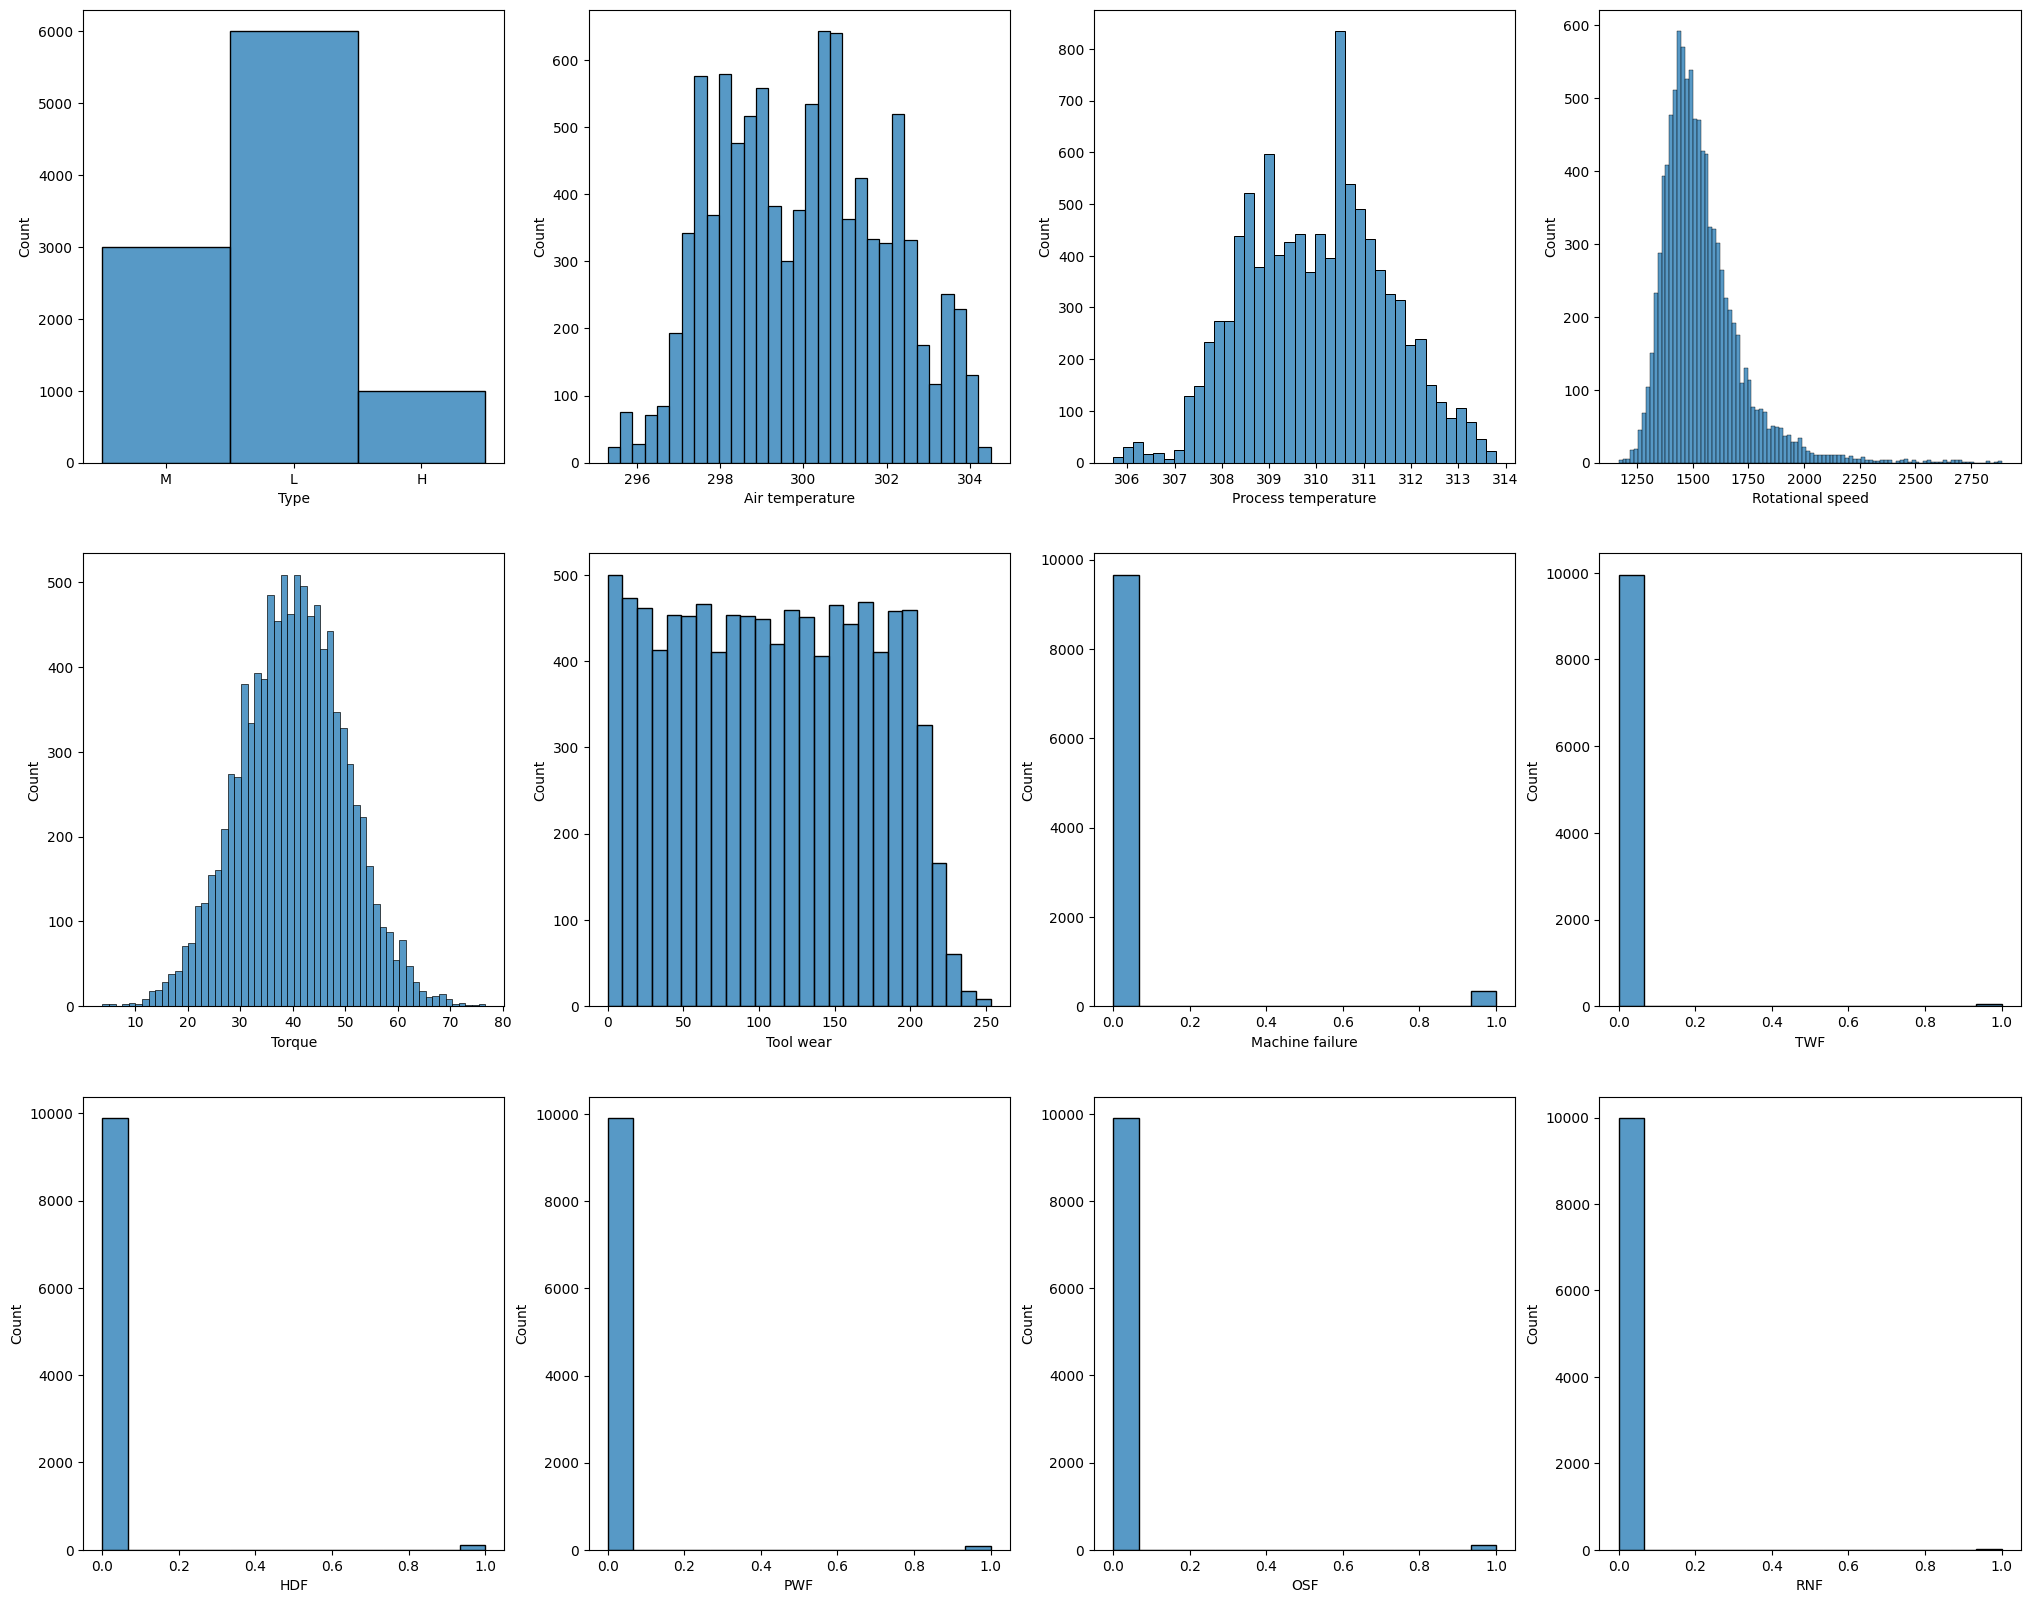

In [12]:
fig, ax = plt.subplots(3, 4, figsize=(25, 20))

for i, col in enumerate(df.columns):
    sns.histplot(df[col], ax=ax[i//4][i%4])

Text(0.5, 1.0, 'Number of failure types per record')

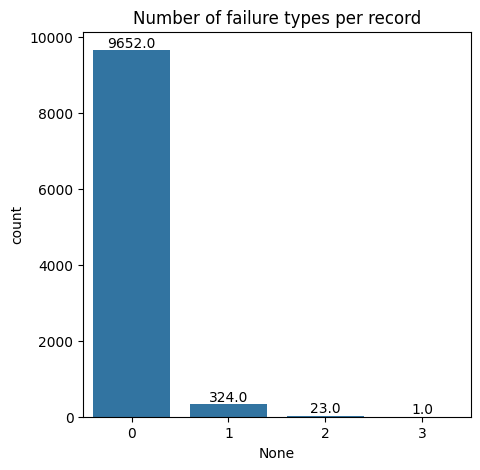

In [13]:
df_failures = df.loc[:, ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']]

# Calculate the sum of the values in each row
rows_sum = df_failures.sum(axis=1)

fig, ax = plt.subplots(figsize=(5, 5))
sns.countplot(x=rows_sum, ax=ax)
for patch in ax.patches:
    ax.annotate(str(patch.get_height()), (patch.get_x() + patch.get_width()/2, patch.get_height()), ha='center', va='bottom')
ax.set_title('Number of failure types per record')

As shown above, 24 records contain more than one type of failure, but their count is very small compared to the entire data set, so we will combine the failure types into one feature. The individual failure types are then dropped.

> No failure = 0, TWF = HDF = PWF = OSF = RNF = 1


In [14]:
df['Machine failure'] = 0

df.loc[df['TWF'] == 1, 'Machine failure'] = 1
df.loc[df['HDF'] == 1, 'Machine failure'] = 1
df.loc[df['PWF'] == 1, 'Machine failure'] = 1
df.loc[df['OSF'] == 1, 'Machine failure'] = 1
df.loc[df['RNF'] == 1, 'Machine failure'] = 1

# drop individual failure types
df.drop(['TWF', 'HDF', 'PWF', 'OSF', 'RNF'], axis=1, inplace=True)

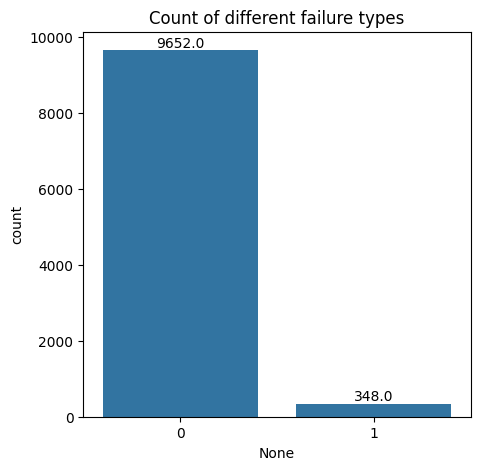

In [15]:
failure_types = df.loc[:, ['Machine failure']]

rows_sum = failure_types.sum(axis=1)

fig, ax = plt.subplots(figsize=(5, 5))
sns.countplot(x=rows_sum, ax=ax)
for patch in ax.patches:
    ax.annotate(str(patch.get_height()), (patch.get_x() + patch.get_width()/2, patch.get_height()), ha='center', va='bottom')
    ax.set_title('Count of different failure types')

We can derive a new attribute using this formula:

$Power = Torque \times Rotational \ speed$

In [16]:
df['Power'] = df[['Rotational speed', 'Torque']].product(axis=1)

<Axes: xlabel='Power', ylabel='Count'>

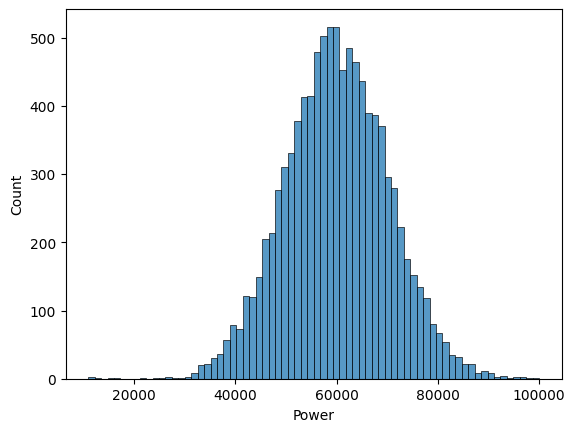

In [17]:
# Plot the histogram of Power attribute
sns.histplot(df['Power'])

## **Data type conversion** ⛓️

In [18]:
# convert Type attribute into numbers, such that L = 0, M = 1, and H = 2
df['Type'].replace('L', 0, inplace=True)
df['Type'].replace('M', 1, inplace=True)
df['Type'].replace('H', 2, inplace=True)

In [19]:
# turn all columns into float for easier processing later
for column in df.columns:
    df[column] = df[column].astype(float)

In [20]:
# view columns data types
df.dtypes

Type                   float64
Air temperature        float64
Process temperature    float64
Rotational speed       float64
Torque                 float64
Tool wear              float64
Machine failure        float64
Power                  float64
dtype: object

## **Handling outliers**❗

In [21]:
# List of columns to exclude from normalization and winsorization
excluded_columns = ['Type', 'Machine failure']

Calculate and handle the outliers for each attribute using IQR and Winsorization 

In [22]:
for col in df.columns:
    if col not in excluded_columns:
        # calculate the IQR (interquartile range)
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = df[(df[col] <= (Q1 - 1.5 * IQR)) | (df[col] >= (Q3 + 1.5 * IQR))]
        if not outliers.empty:
          #df.loc[outliers.index, col] = winsorize(outliers[col], limits=[0.08, 0.08])
          df.drop(outliers.index, inplace=True)

Density-Based Anomaly Detection (LOF)

In [23]:
from sklearn.neighbors import LocalOutlierFactor

# create the LOF model
model = LocalOutlierFactor(n_neighbors=5)

# use the model to predict the outlier scores for each row
scores = model.fit_predict(df)

# identify the outlier rows (those with a negative score) and remove them
outliers = df[scores == -1]
if not outliers.empty:
    df.drop(outliers.index, inplace=True)

In [24]:
df.shape # after removing the outliers

(9400, 8)

## **Transformation** ⛏️

Normalize the attributes using z-score

$z = \frac{x - \mu} {\sigma}$, $\mu:$ Mean, $σ:$ Standard deviation

In [25]:
from scipy.stats import zscore

# Iterate over the columns in the dataframe
for col in df.columns:
      if col not in excluded_columns:
        # Normalize the values in the column
        df[col] = zscore(df[col])

## **More visualizations** 📊 

Box and Whisker Plots for each attribute compared with Machine failure (target)

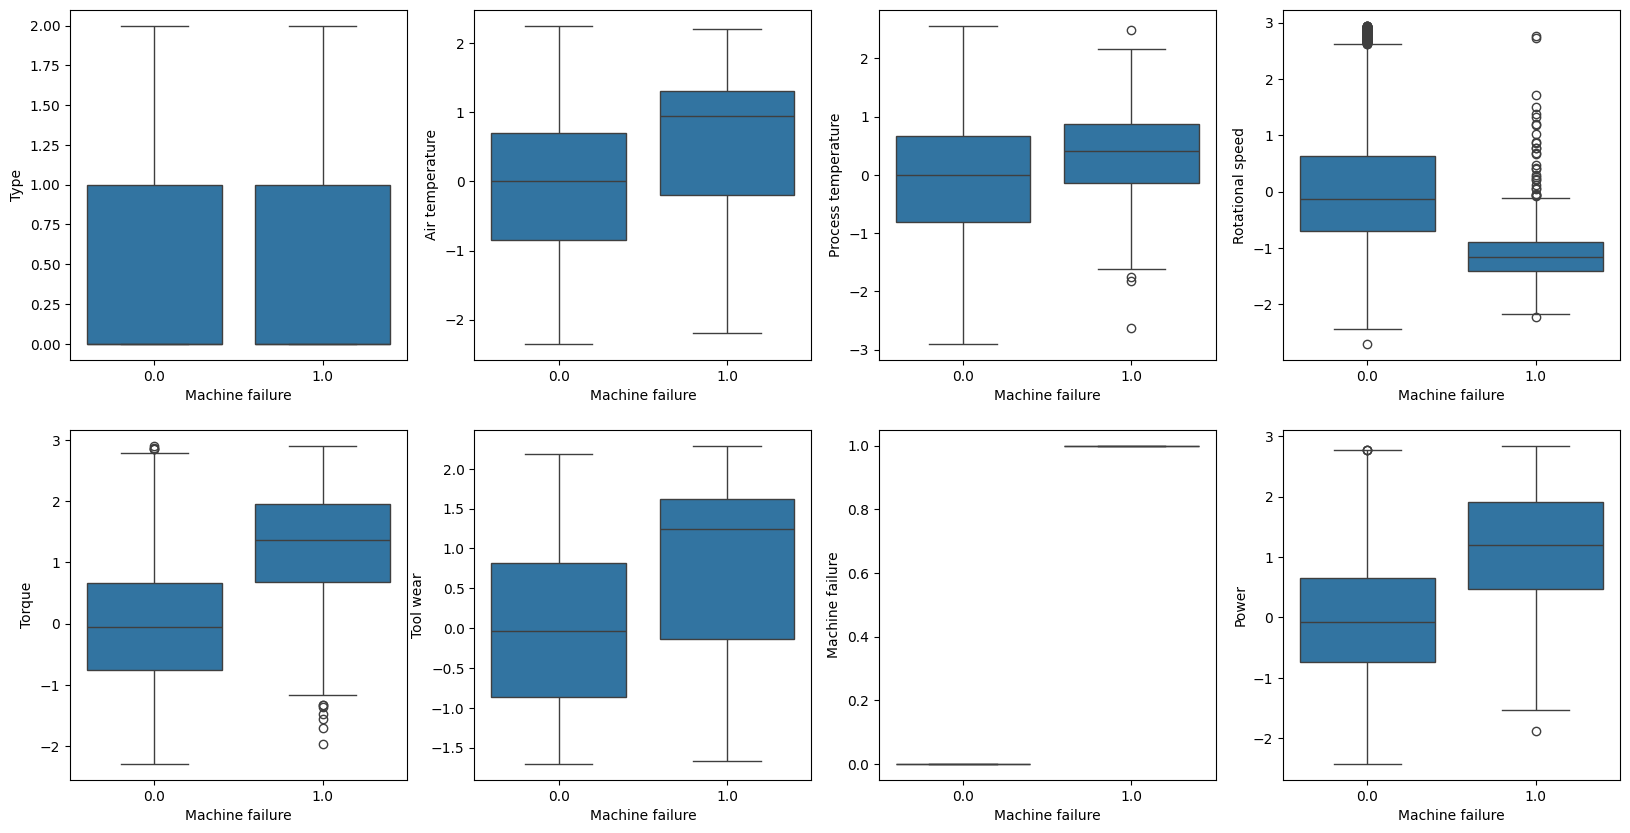

In [26]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for i, col in enumerate(df.columns):
    sns.boxplot(x="Machine failure", y=col, data=df, ax=ax[i//4][i%4])

Box and Whisker Plots for each attribute

<Axes: title={'center': 'Box and Whisker Plots'}, ylabel='Value'>

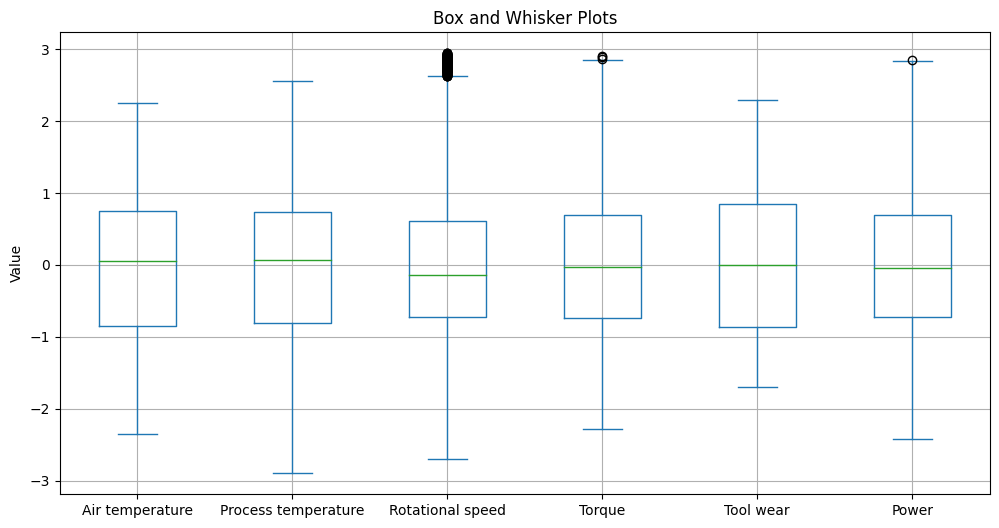

In [27]:
plot_columns = [col for col in df.columns if col not in excluded_columns]
df[plot_columns].plot(kind='box', figsize=(12, 6), title='Box and Whisker Plots', ylabel='Value', grid=True)

Finding the correlation between the attributes with threshold = 0.3


<Axes: >

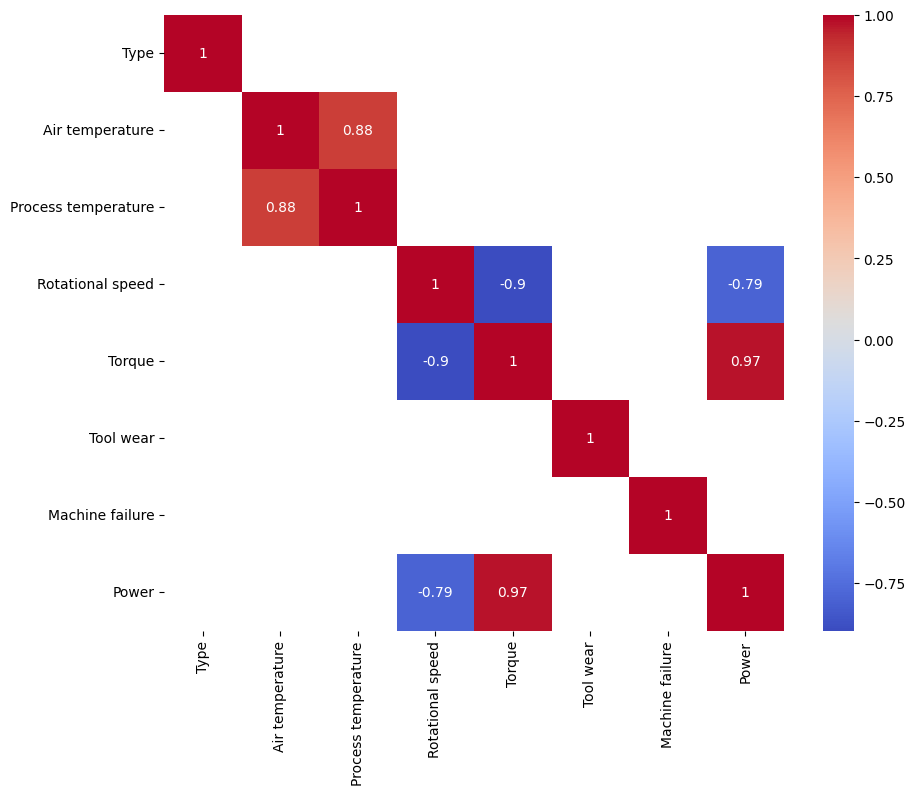

In [28]:
# There are strongly correlated features
threshold = 0.3
correlation = df.corr()
matrix = correlation.where((abs(correlation) >= threshold)).isna()
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), cmap="coolwarm", annot=True, mask=matrix)

A scatter plot matrix to display the relationships between attributes in the dataset

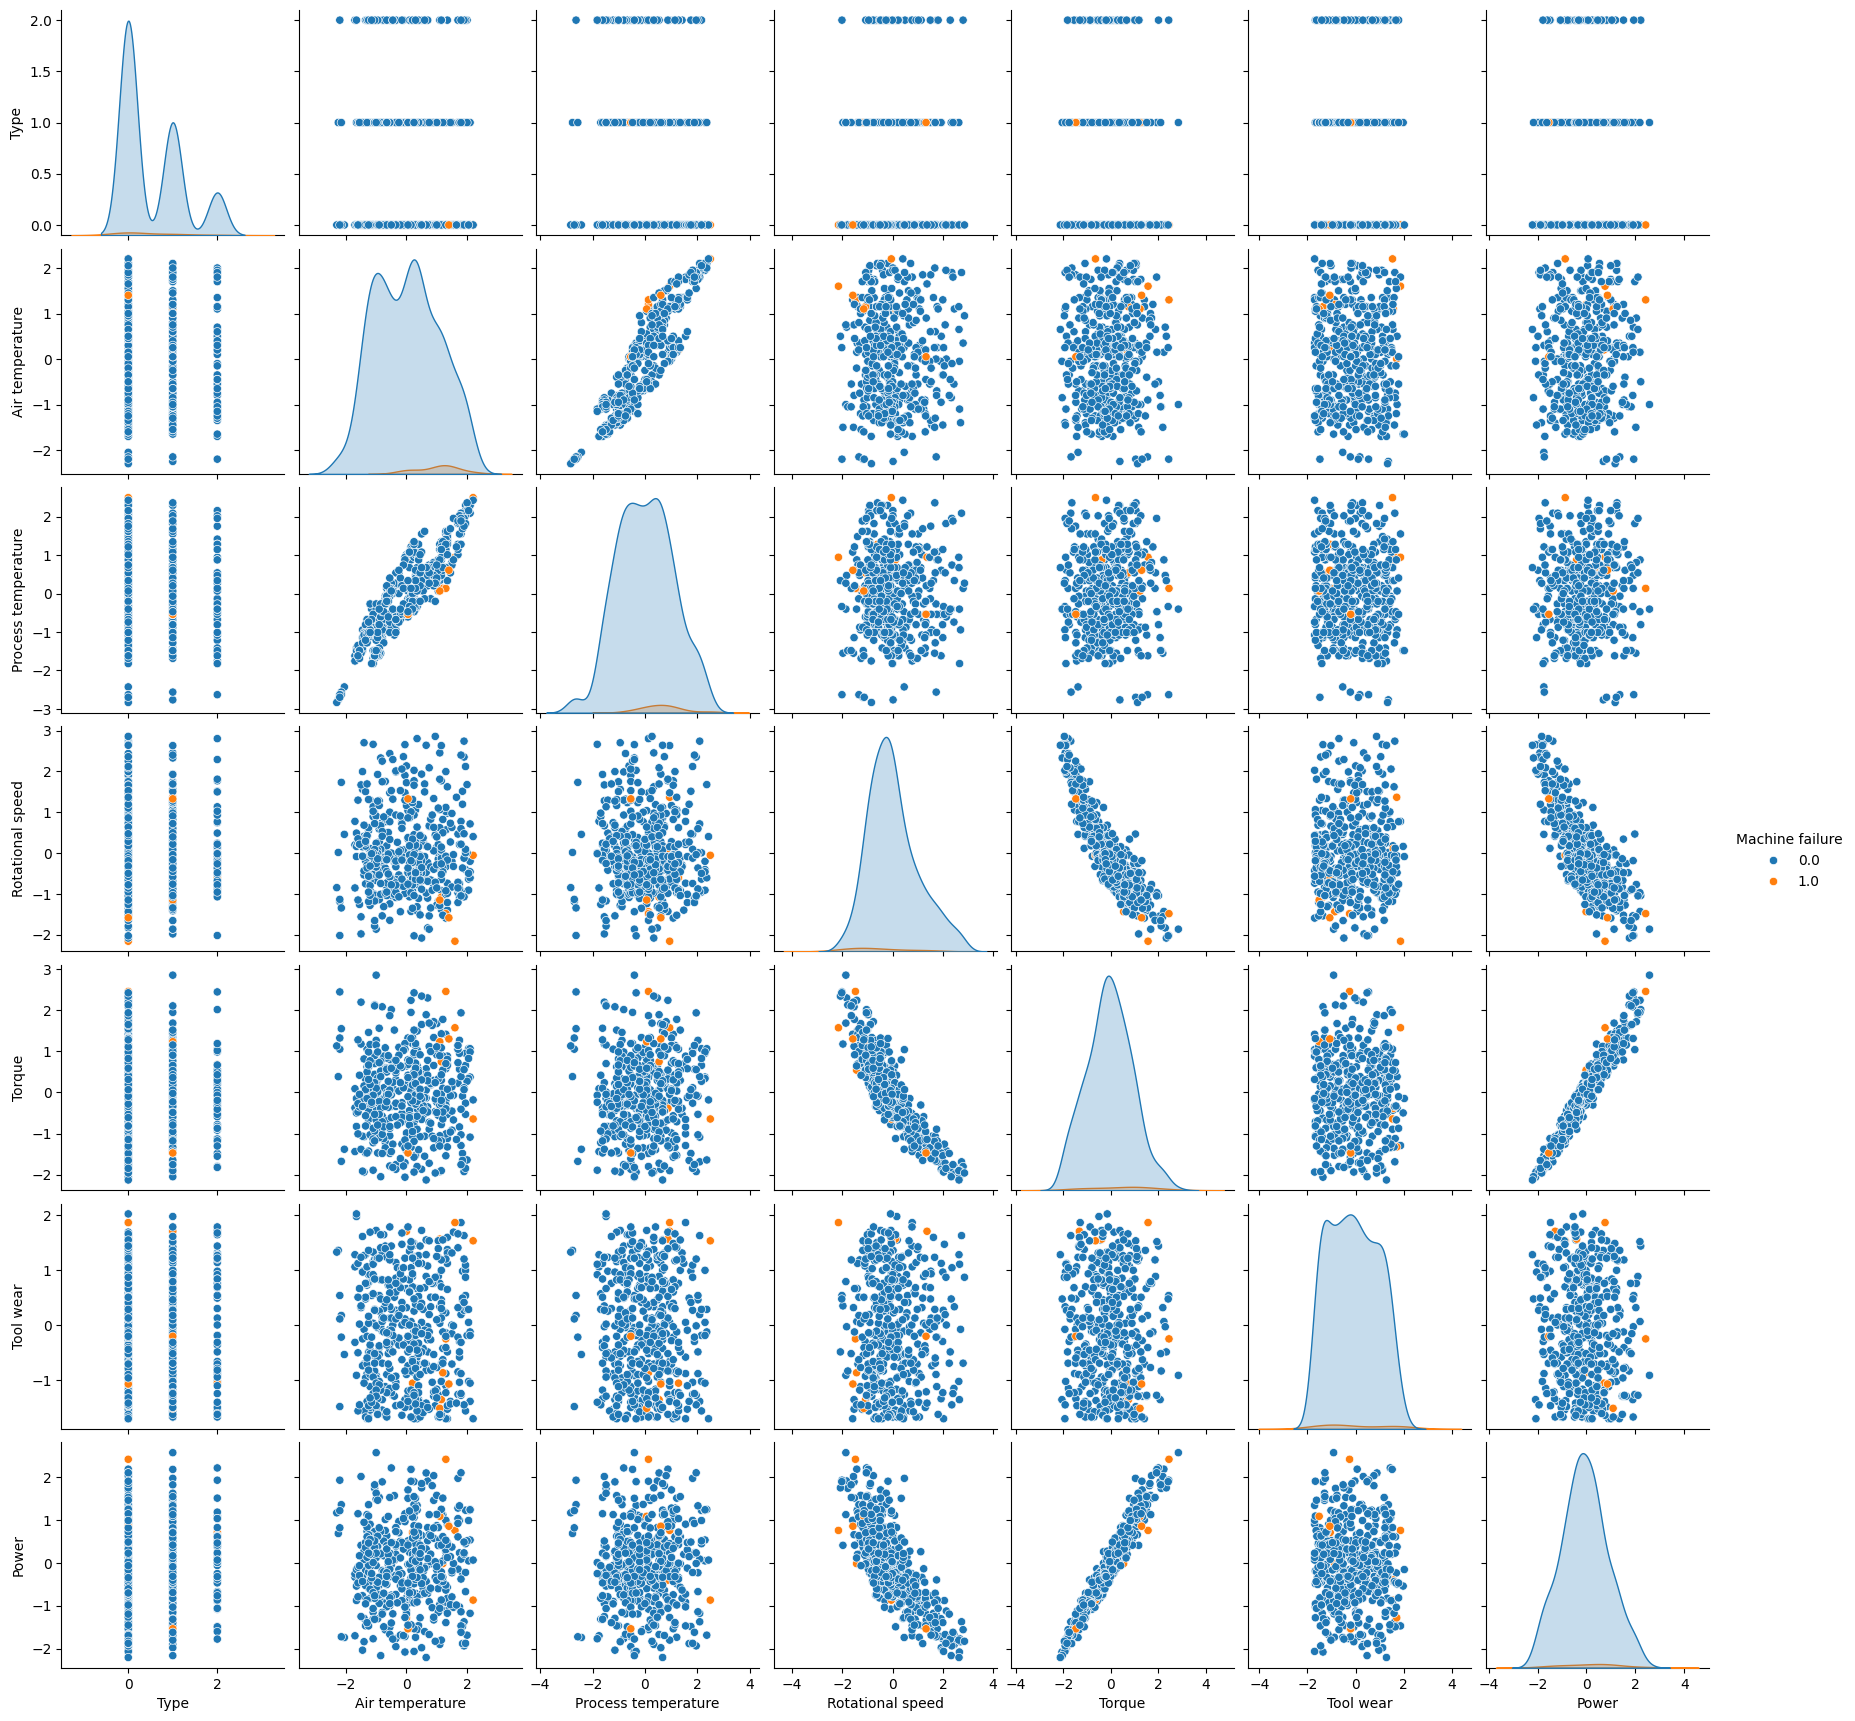

In [29]:
sns.pairplot(df.sample(frac=0.05), hue='Machine failure')

Parallel coordinate plot (multi-dimensional view)

<Axes: >

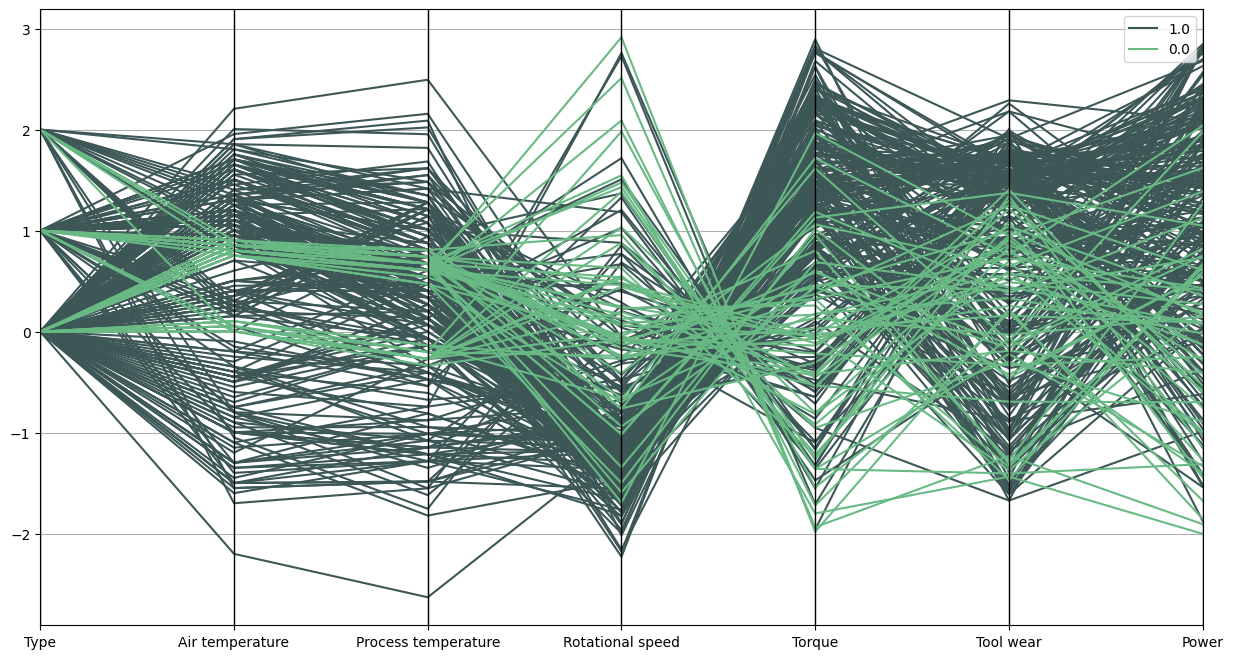

In [30]:
sample = df.sort_values(by=['Machine failure'], ascending=False).head(300)

plt.figure(figsize=(15,8))
pd.plotting.parallel_coordinates(sample, 'Machine failure', color=('#3D5656', '#68B984', '#FED049'))

# **Descriptive analytics** 📝

## **Clustering** 🧩

In [31]:
# features to use for clustering
X = df[["Air temperature", "Process temperature", "Rotational speed", "Torque", "Tool wear", "Power"]]

* Partitional Clustering, **K-means algorithm**

Elbow method to determine the optimal number (k) of clusters

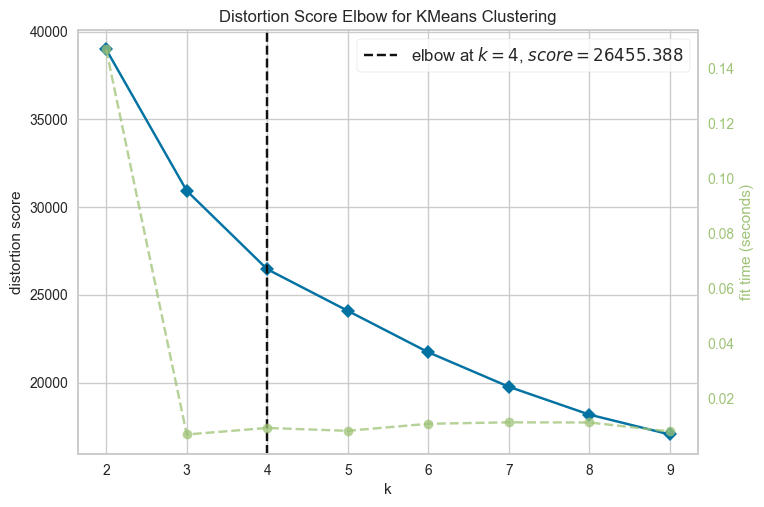

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [32]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

# K-means clustering
model = KMeans()

visualizer = KElbowVisualizer(model, k=(2,10)) # it turns out that k = 4 is the optimal number of clusters 

visualizer.fit(X)
visualizer.show()

In [33]:
from sklearn.cluster import KMeans

# K-means clustering
kmeans = KMeans(init="random",  n_clusters=4,
                n_init=10, max_iter=300, random_state=42)
kmeans.fit(X)

df["kmeans_cluster"] = kmeans.predict(X)

Plot the results

<Figure size 1000x800 with 0 Axes>

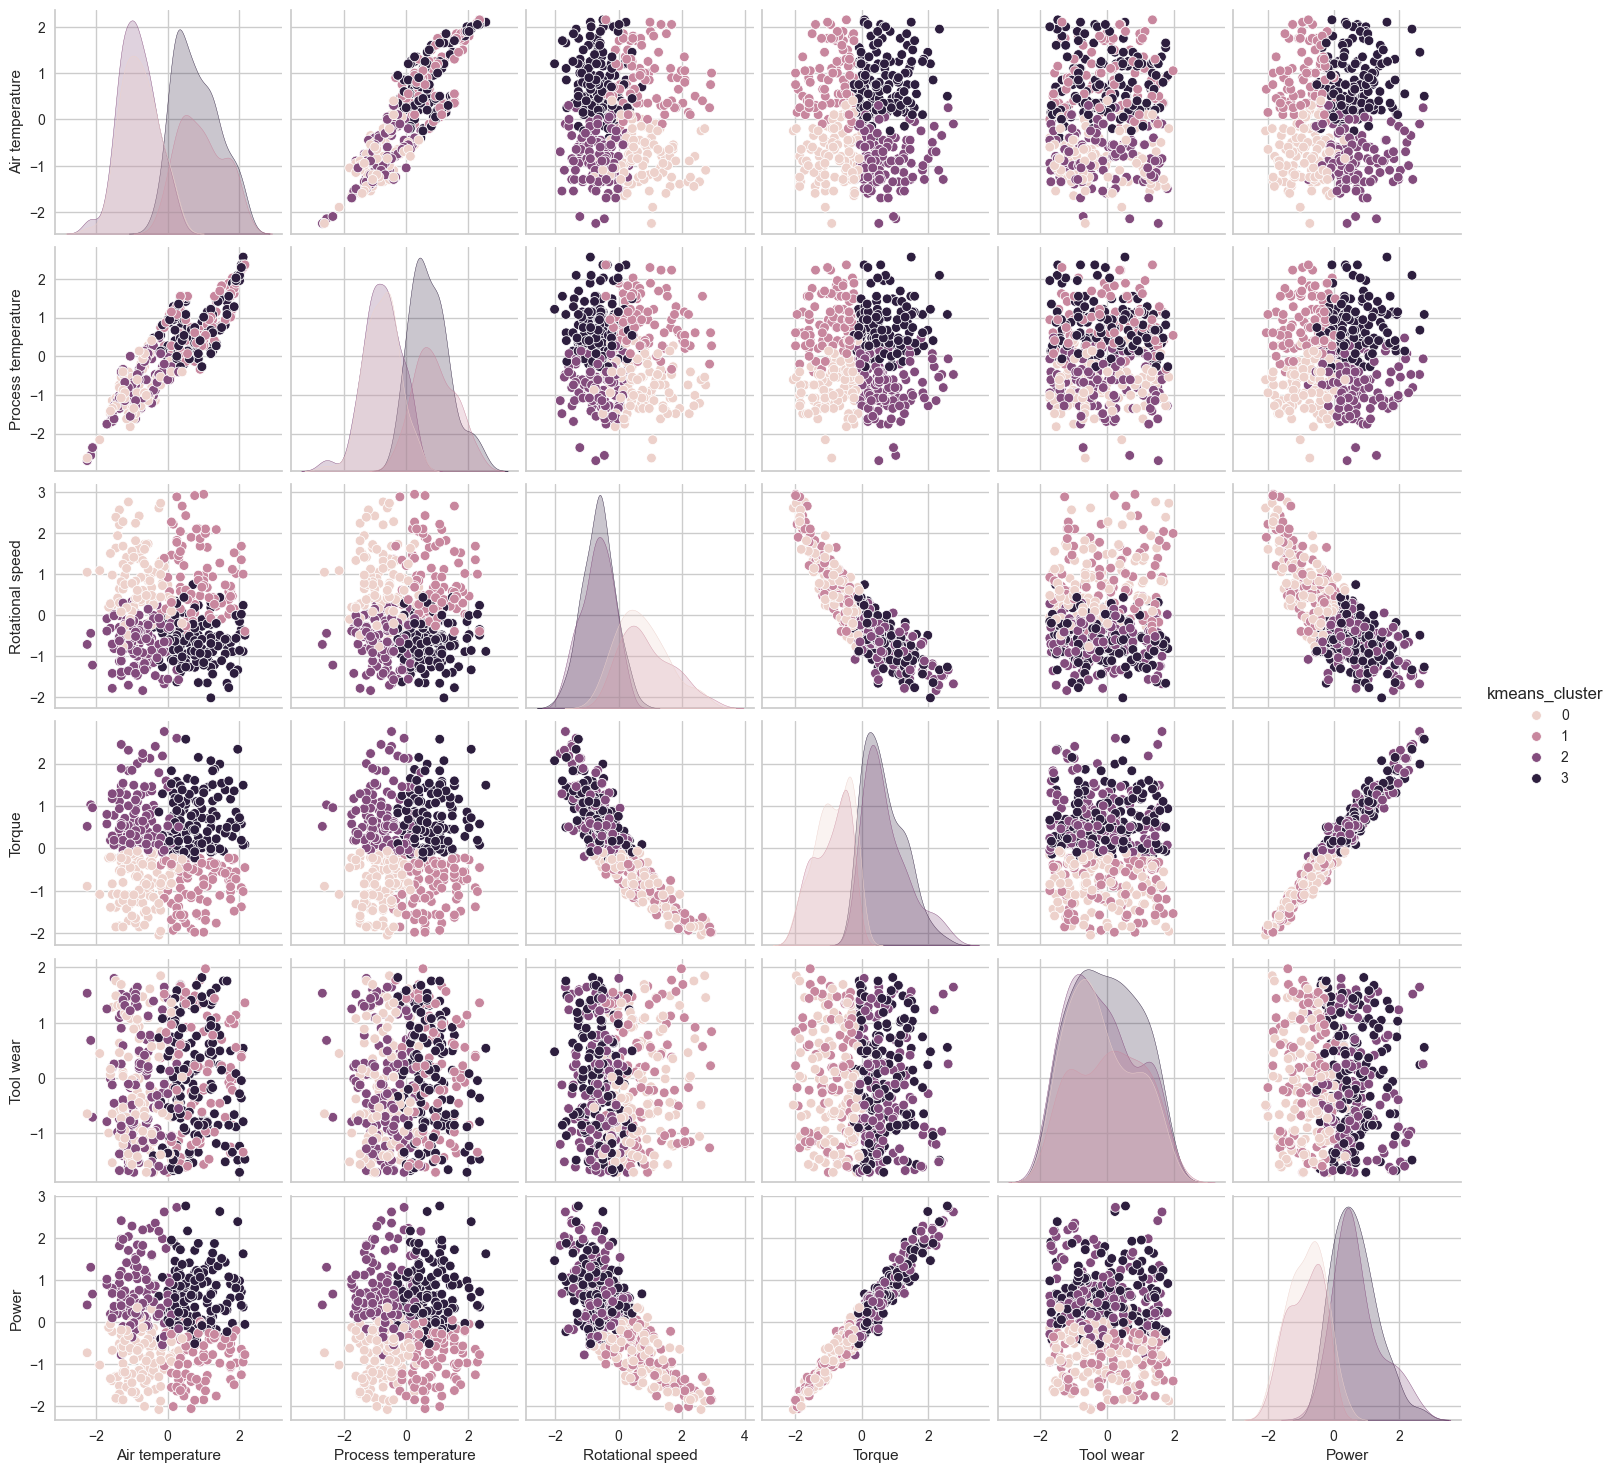

In [34]:
plt.figure(figsize=(10, 8))

# create a pairplot of the data, colored by cluster label
sns.pairplot(df.sample(frac=0.05), hue="kmeans_cluster", vars=["Air temperature", "Process temperature", "Rotational speed", "Torque", "Tool wear", "Power"])
plt.show()

Silhouette coefficient for k-means algorithm

In [35]:
from sklearn.metrics import silhouette_score

# calculate the silhouette coefficient
score = silhouette_score(X, kmeans.predict(X))

print(f"Silhouette Coefficient: {score:.3f}")

Silhouette Coefficient: 0.225


* Hierarchical clustering, **Agglomerative**

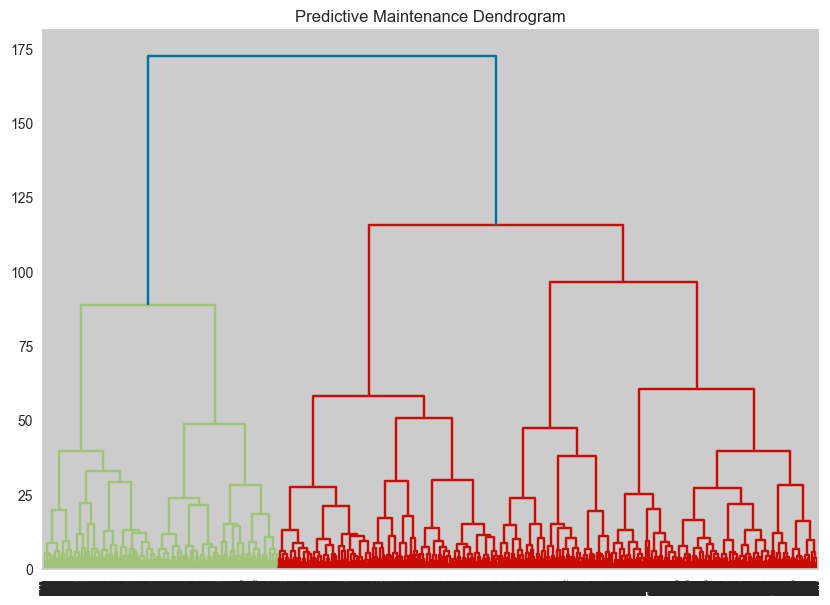

In [36]:
import scipy.cluster.hierarchy as shc

# plot dendogram
plt.figure(figsize=(10, 7))
plt.title("Predictive Maintenance Dendrogram")

# Selecting Annual Income and Spending Scores by index
clusters = shc.linkage(X, method='ward', metric="euclidean")
shc.dendrogram(Z=clusters)
plt.show()

Plot the results

KeyError: 'hierarchical_cluster'

<Figure size 1000x800 with 0 Axes>

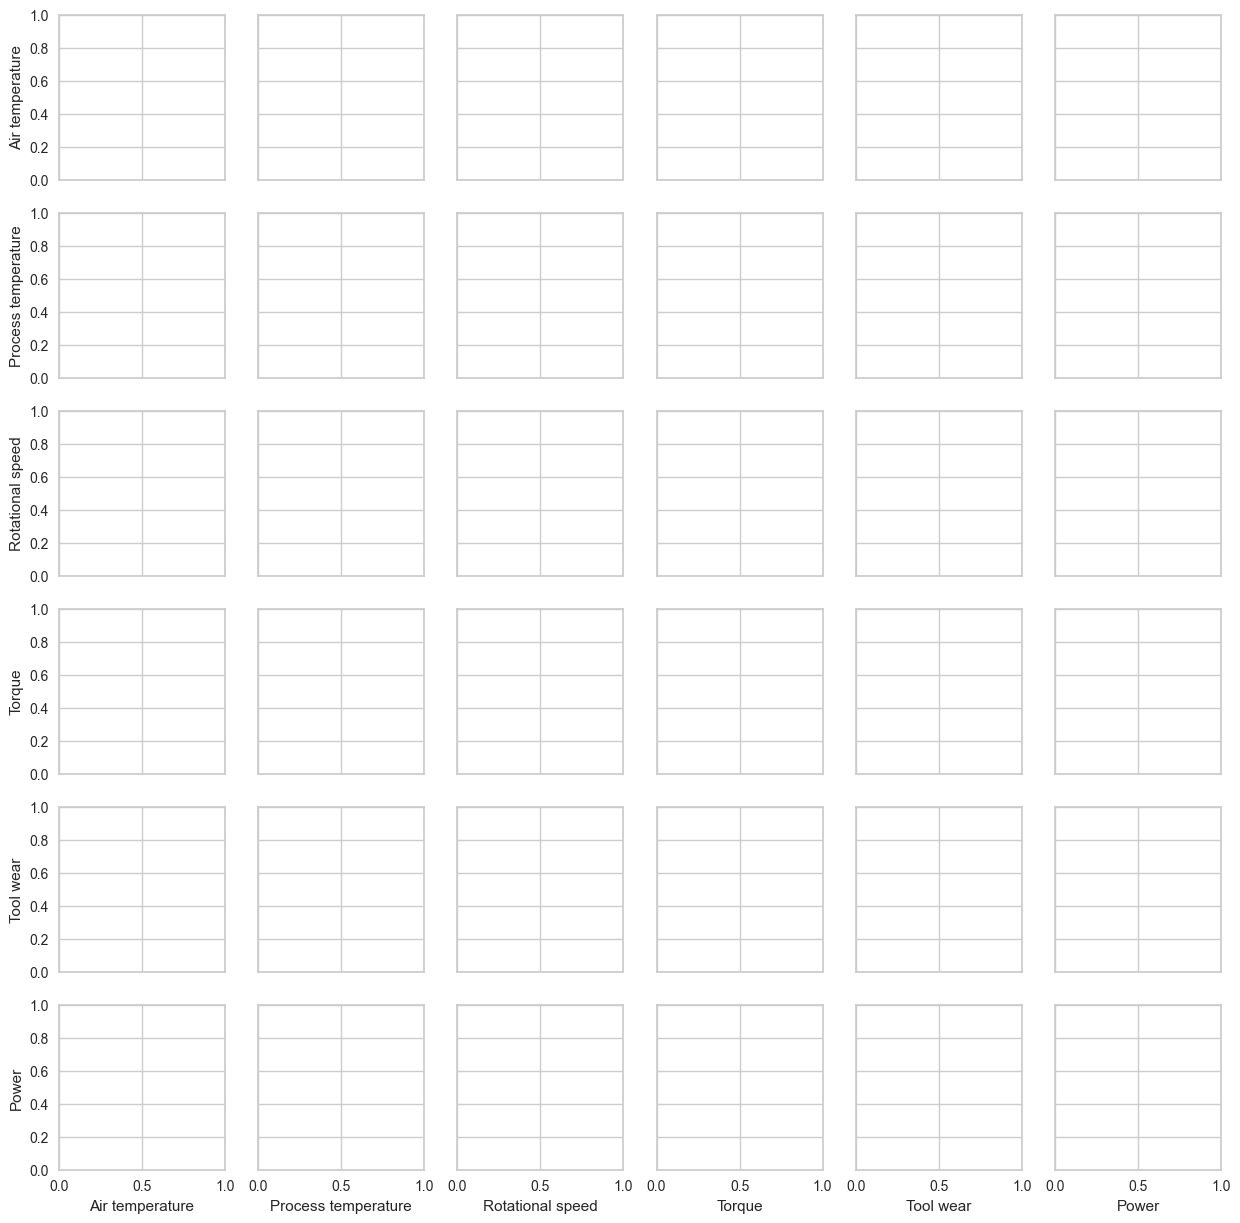

In [39]:
plt.figure(figsize=(10, 8))

# create a pairplot of the data, colored by cluster label
sns.pairplot(df.sample(frac=0.05), hue="hierarchical_cluster", vars=["Air temperature", "Process temperature", "Rotational speed", "Torque", "Tool wear", "Power"])
plt.show()

Silhouette coefficient for Agglomerative clustering algorithm

In [ ]:
from sklearn.metrics import silhouette_score

# calculate the silhouette coefficient
score = silhouette_score(X, df["hierarchical_cluster"])

print(f"Silhouette Coefficient: {score:.3f}")

Silhouette Coefficient: 0.180


* Density-based clustering, **DBSACN**


Determining EPS and MinPts for DBSACN algorithm

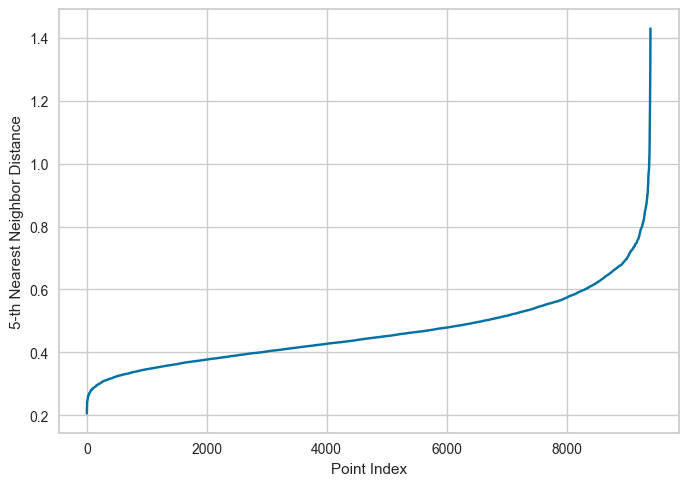

In [ ]:
from sklearn.neighbors import NearestNeighbors

k = 5

# create the nearest neighbors model
nn = NearestNeighbors(n_neighbors=k)
nn.fit(X)

# get the distances and indices of the kth nearest neighbors for each point
distances, indices = nn.kneighbors(X)

# get the kth nearest neighbor distances for each point
kth_distances = distances[:, k-1]

# sort the kth nearest neighbor distances
kth_distances_sorted = np.sort(kth_distances)

plt.plot(kth_distances_sorted)
plt.xlabel('Point Index')
plt.ylabel('5-th Nearest Neighbor Distance')
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN

# create a DBSCAN model
model = DBSCAN(eps=0.7, min_samples=5)
model.fit(X)

# obtain the cluster labels
df['dbscan_cluster'] = model.labels_

In [ ]:
from sklearn.metrics import silhouette_score

# calculate the silhouette coefficient
score = silhouette_score(X, df["dbscan_cluster"])

print(f"Silhouette Coefficient: {score:.3f}")

Silhouette Coefficient: 0.292


Plot the results

<Figure size 1000x800 with 0 Axes>

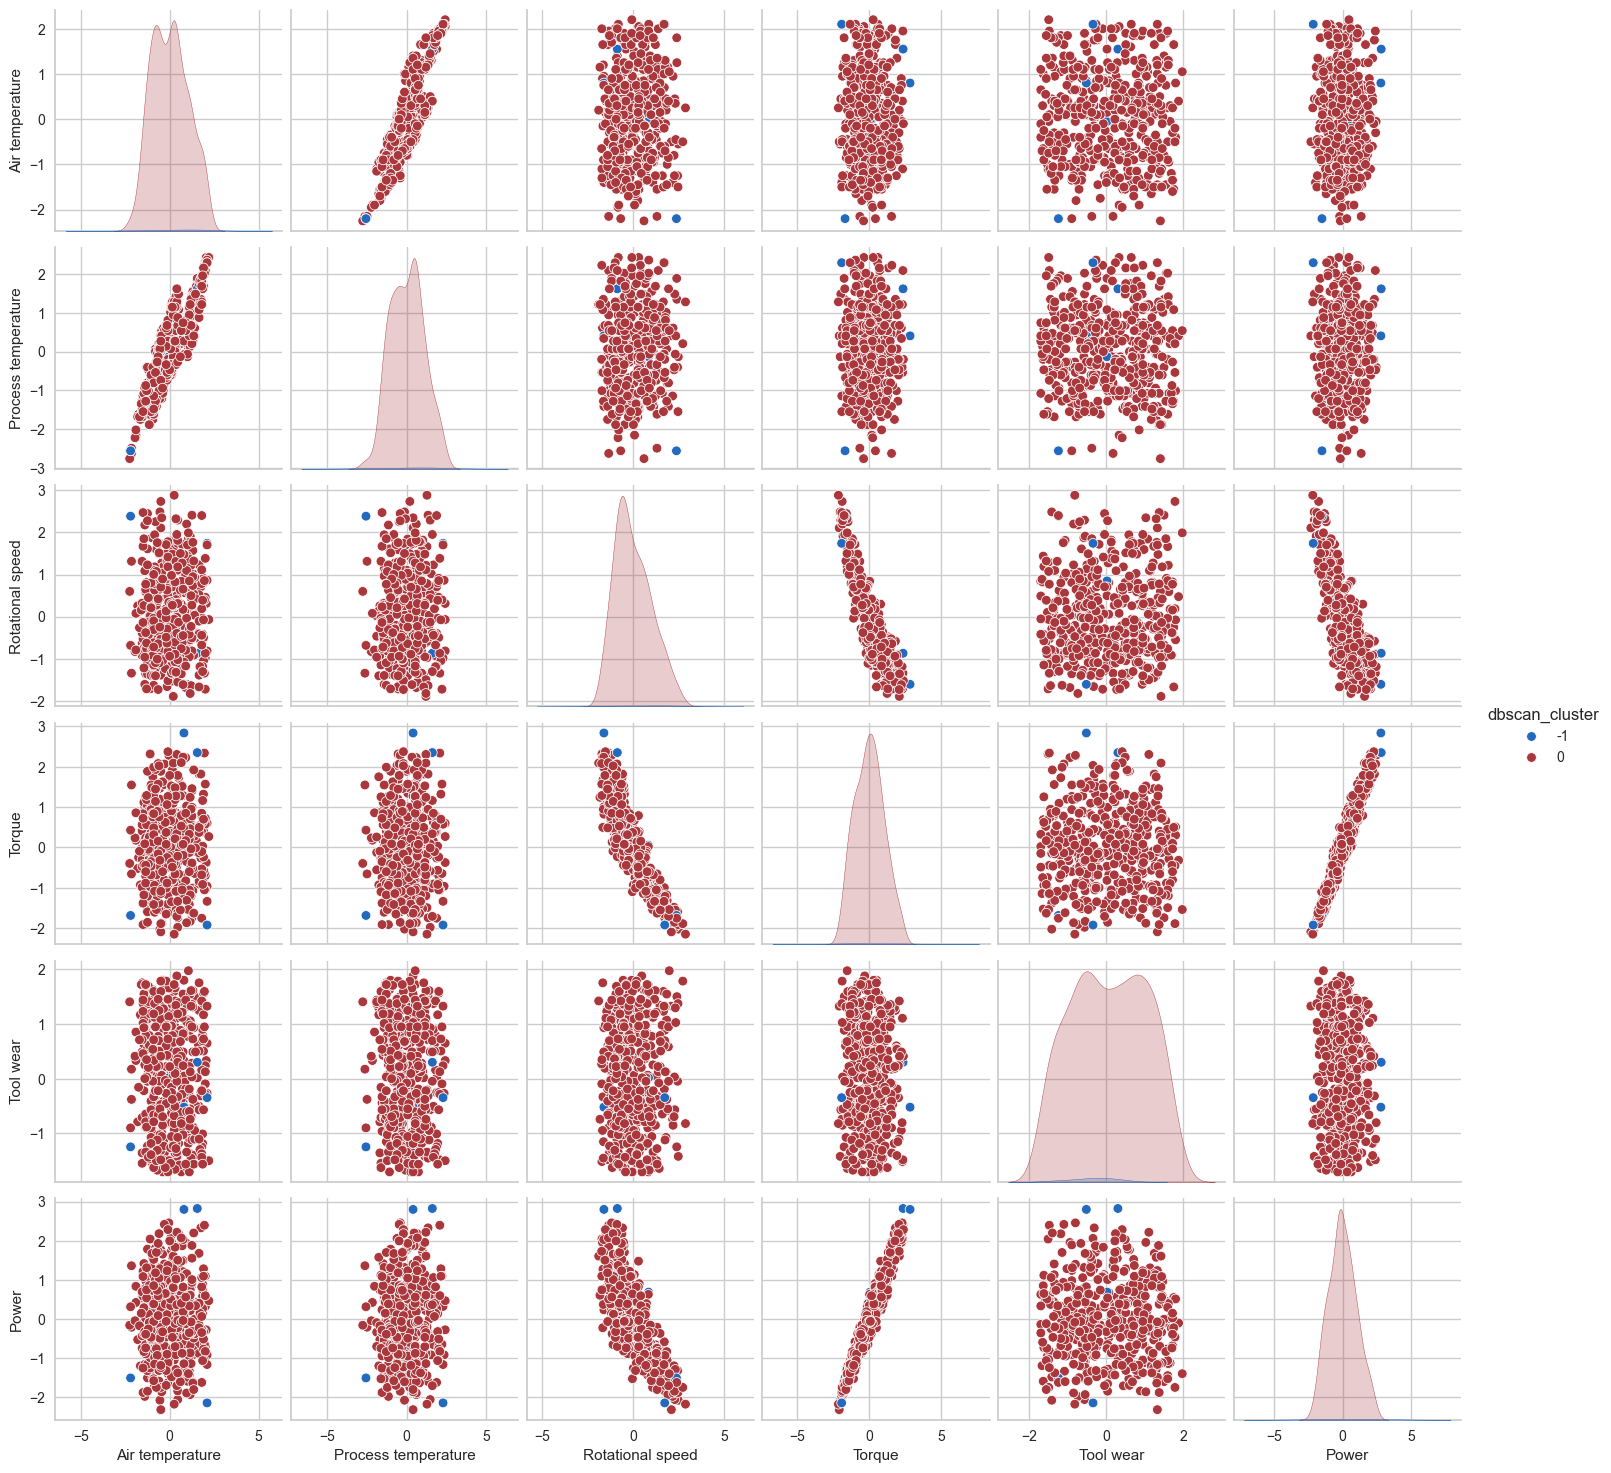

In [ ]:
plt.figure(figsize=(10, 8))

# create a pairplot of the data, colored by cluster label
sns.pairplot(df.sample(frac=0.05), hue="dbscan_cluster", palette="vlag", vars=["Air temperature", "Process temperature", "Rotational speed", "Torque", "Tool wear", "Power"])
plt.show()

# **Modeling** 🧪

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, classification_report
import time

model_performance = pd.DataFrame(columns=['Accuracy', 'Precision',
                                          'Recall', 'F1-Score', 'Training time',
                                          'Prediction time'])

def log_scores(model_name, y_test, y_predictions):
    accuracy = accuracy_score(y_test, y_predictions)
    precision = precision_score(y_test, y_predictions, average='weighted')
    recall = recall_score(y_test, y_predictions, average='weighted')
    precision = precision_score(y_test, y_predictions, average='weighted')
    f1 = f1_score(y_test, y_predictions, average='weighted')

    # save the scores in model_performance dataframe
    model_performance.loc[model_name] = [accuracy, precision, recall, f1,
                                       end_train-start, end_predict-end_train]

## **Data splitting and sampling** 🧮

In [ ]:
df.columns

Index(['Type', 'Air temperature', 'Process temperature', 'Rotational speed',
       'Torque', 'Tool wear', 'Machine failure', 'Power', 'kmeans_cluster',
       'hierarchical_cluster', 'dbscan_cluster'],
      dtype='object')

Split the dataset (70% train : 30% test)

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(["Machine failure", "kmeans_cluster", "hierarchical_cluster", "dbscan_cluster"], axis=1)
y = df["Machine failure"]

# Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3, 
                                                    random_state = 0,
                                                    stratify = y)

Because the data is imbalanced, we oversample the training set

In [ ]:
from imblearn.over_sampling import SVMSMOTE
from imblearn.over_sampling import RandomOverSampler

oversample = SVMSMOTE(random_state = 42)
#oversample = RandomOverSampler(random_state=42)

X_train, y_train = oversample.fit_resample(X_train, y_train)

Training set after oversampling

(array([6406.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        6406.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

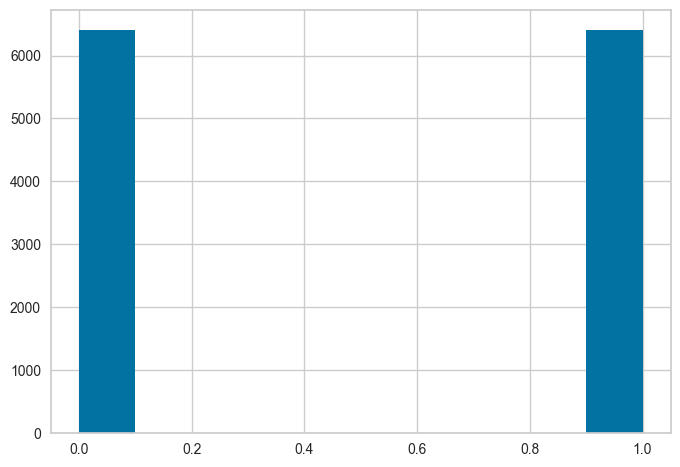

In [ ]:
plt.hist(y_train)

## **Decision Tree Model**

Build the model

In [ ]:
from sklearn.tree import DecisionTreeClassifier

start = time.time()
model = DecisionTreeClassifier(max_depth = 8).fit(X_train, y_train)
end_train = time.time()
y_predictions = model.predict(X_test)
end_predict = time.time()

# evaluate the model
log_scores("Decision Tree", y_test, y_predictions)

Model evaluation for each Machine failure class:

0. No failure
1. Machine failure

In [ ]:
print("Decision Tree\n" + classification_report(y_test, y_predictions))

Decision Tree
              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98      2746
         1.0       0.39      0.69      0.50        74

    accuracy                           0.96      2820
   macro avg       0.69      0.83      0.74      2820
weighted avg       0.98      0.96      0.97      2820



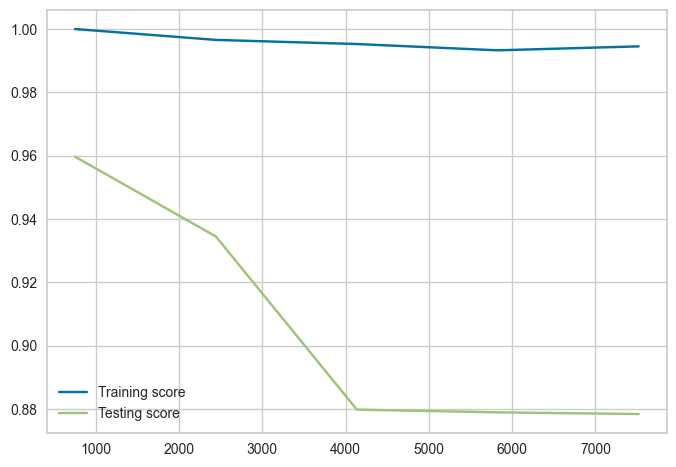

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)

# plot the learning curve
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, test_scores .mean(axis=1), label='Testing score')
plt.legend(loc='best')
plt.show()

Confusion matrix of Decision Tree model

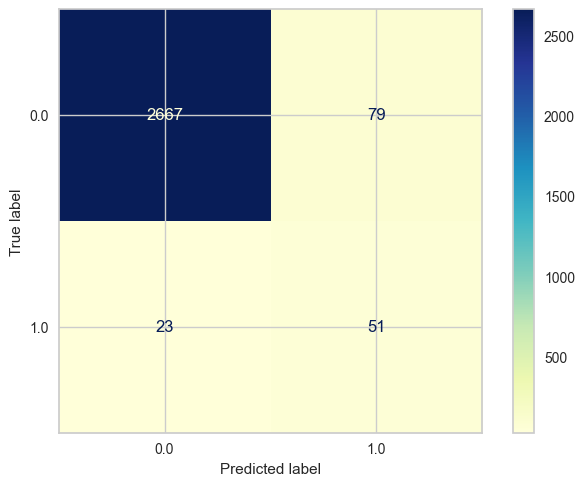

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_predictions, cmap=plt.cm.YlGnBu)  

In [ ]:
from sklearn.tree import export_text

rules = export_text(model)

# print the rules
print(rules)

|--- feature_3 <= -0.99
|   |--- feature_5 <= 1.08
|   |   |--- feature_1 <= 0.71
|   |   |   |--- feature_6 <= 2.41
|   |   |   |   |--- feature_4 <= 2.58
|   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- feature_4 >  2.58
|   |   |   |   |   |--- feature_1 <= 0.51
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- feature_1 >  0.51
|   |   |   |   |   |   |--- class: 1.0
|   |   |   |--- feature_6 >  2.41
|   |   |   |   |--- feature_0 <= 0.21
|   |   |   |   |   |--- feature_5 <= 1.04
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- feature_5 >  1.04
|   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- feature_0 >  0.21
|   |   |   |   |   |--- feature_2 <= 0.59
|   |   |   |   |   |   |--- feature_3 <= -1.70
|   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |--- feature_3 >  -1.70
|   |   |   |   |   |   |   |--- feature_4 <= 2.32
|   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |--- feature_4

## **k-NN (K-nearest neighbors) Model**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# create the model
knn = KNeighborsClassifier()

# define the parameter grid
param_grid = {'n_neighbors': range(2, 20)}

# create the grid search object
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# fit the grid search to the data
grid_search.fit(X_train, y_train)

# print the best parameters
print(grid_search.best_params_)

{'n_neighbors': 2}


Build the model

In [ ]:
start = time.time()
model = KNeighborsClassifier(n_neighbors=2).fit(X_train, y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # predictions from the testset
end_predict = time.time()

# evaluate the model
log_scores("k-NN", y_test, y_predictions)

Model evaluation for each Machine failure class:

0. No failure
1. Machine failure

In [ ]:
print("k-NN Model\n" + classification_report(y_test, y_predictions))

k-NN Model
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      2746
         1.0       0.51      0.49      0.50        74

    accuracy                           0.97      2820
   macro avg       0.75      0.74      0.74      2820
weighted avg       0.97      0.97      0.97      2820



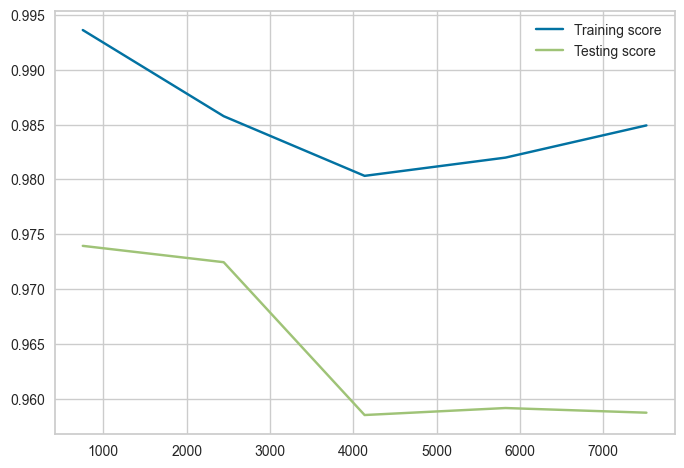

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)

# plot the learning curve
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, test_scores .mean(axis=1), label='Testing score')
plt.legend(loc='best')
plt.show()

Confusion matrix of k-NN model

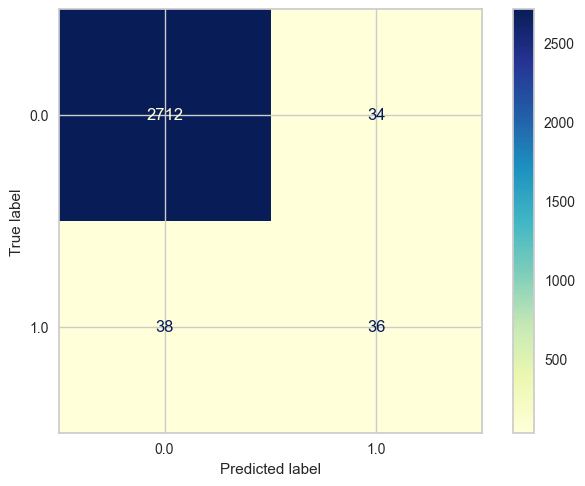

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_predictions, cmap=plt.cm.YlGnBu)  

## **Random Forest Model**

Build the model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

start = time.time()
model = RandomForestClassifier(n_estimators=100, n_jobs=-1,
                               random_state=0, bootstrap=True).fit(X_train, y_train)
end_train = time.time()
y_predictions = model.predict(X_test)
end_predict = time.time()

# evaluate the model
log_scores("Random Forest", y_test, y_predictions)

Model evaluation for each Machine failure class:

0. No failure
1. Machine failure


In [ ]:
print("Random Forest Model\n" + classification_report(y_test, y_predictions))

Random Forest Model
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      2746
         1.0       0.61      0.62      0.61        74

    accuracy                           0.98      2820
   macro avg       0.80      0.81      0.80      2820
weighted avg       0.98      0.98      0.98      2820



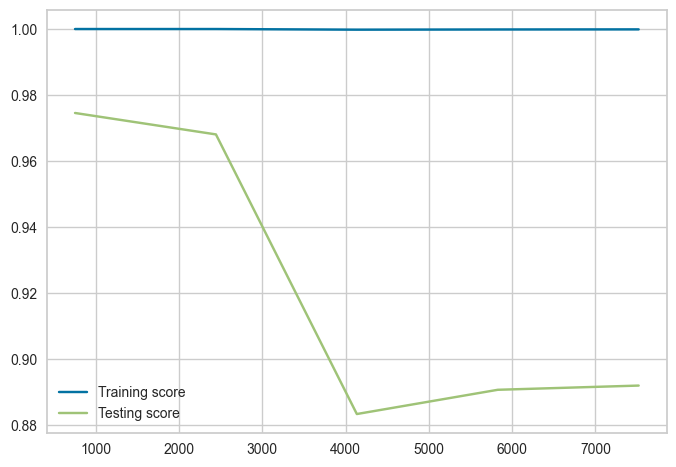

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)

# plot the learning curve
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, test_scores .mean(axis=1), label='Testing score')
plt.legend(loc='best')
plt.show()

Confusion matrix of Random Forest model

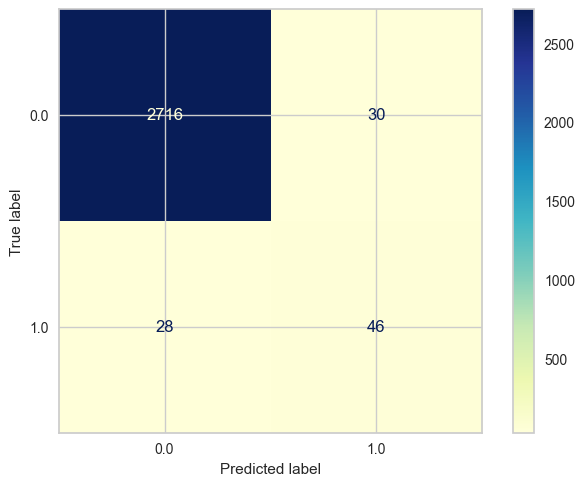

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_predictions, cmap=plt.cm.YlGnBu)  

## **Gradient Boosting Model**

Build the model

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

start = time.time()
model = GradientBoostingClassifier().fit(X_train, y_train)
end_train = time.time()
y_predictions = model.predict(X_test)
end_predict = time.time()

# evaluate the model
log_scores("Gradient Boosting", y_test, y_predictions)

Model evaluation for each Machine failure class:

0. No failure
1. Machine failure

In [ ]:
print("Gradient Boosting\n" + classification_report(y_test, y_predictions))

Gradient Boosting
              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98      2746
         1.0       0.43      0.74      0.54        74

    accuracy                           0.97      2820
   macro avg       0.71      0.86      0.76      2820
weighted avg       0.98      0.97      0.97      2820



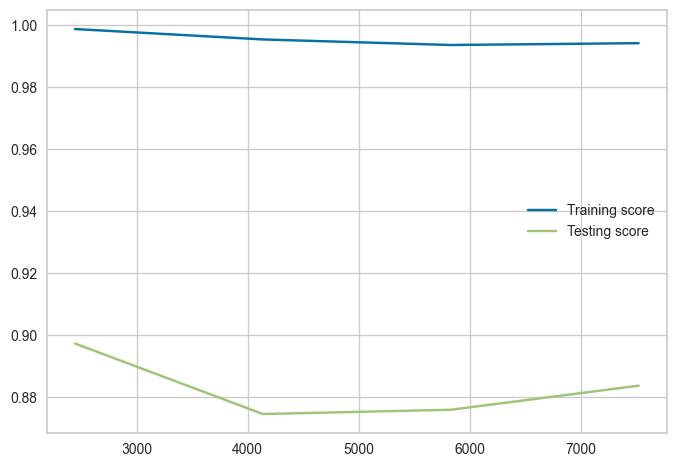

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)

# plot the learning curve
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, test_scores .mean(axis=1), label='Testing score')
plt.legend(loc='best')
plt.show()

Confusion matrix of Gradient Boosting model

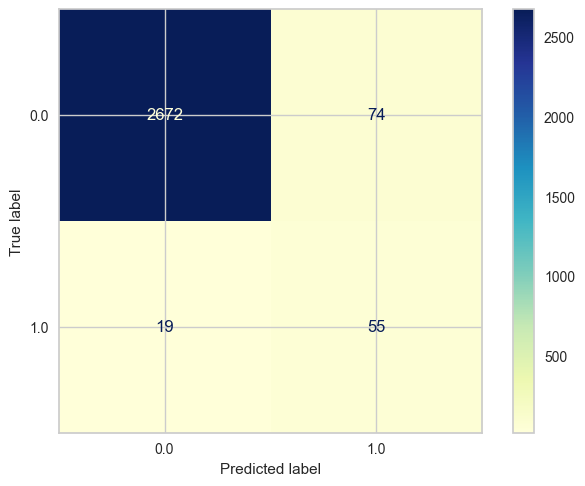

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_predictions, cmap=plt.cm.YlGnBu)  

## **Gaussian Naive Bayes Model**

Build the model

In [ ]:
from sklearn.naive_bayes import GaussianNB

start = time.time()
model = GaussianNB().fit(X_train, y_train)
end_train = time.time()
y_predictions = model.predict(X_test)
end_predict = time.time()

# evaluate the model
log_scores("Gaussian Naive Bayes", y_test, y_predictions)

Model evaluation for each Machine failure class:

0. No failure
1. Machine failure

In [ ]:
print("Gaussian Naive Bayes\n" + classification_report(y_test, y_predictions))

Gaussian Naive Bayes
              precision    recall  f1-score   support

         0.0       0.99      0.83      0.90      2746
         1.0       0.12      0.82      0.20        74

    accuracy                           0.83      2820
   macro avg       0.55      0.83      0.55      2820
weighted avg       0.97      0.83      0.89      2820



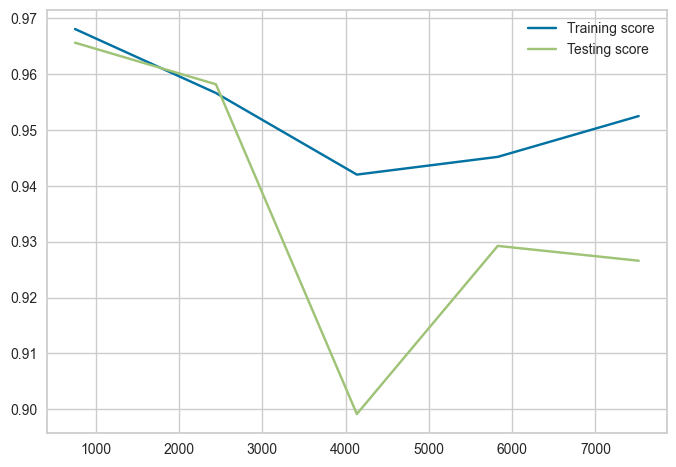

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)

# plot the learning curve
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, test_scores .mean(axis=1), label='Testing score')
plt.legend(loc='best')
plt.show()

Confusion matrix of Gaussian Naive Bayes model

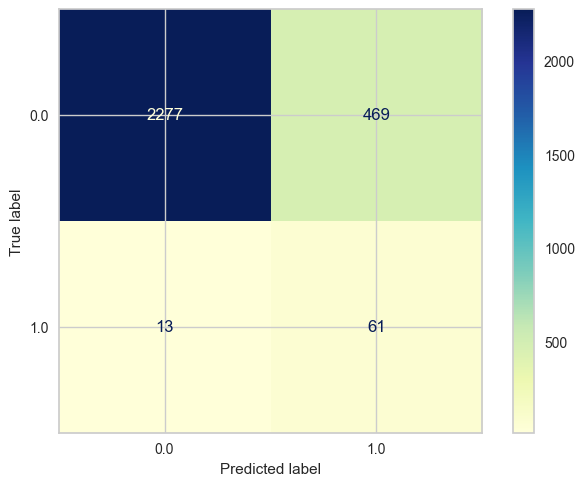

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_predictions, cmap=plt.cm.YlGnBu)  

## **MLP (Multi-layer Perceptron) Model**

Build the model

In [ ]:
from sklearn.neural_network import MLPClassifier

start = time.time()
model = MLPClassifier(random_state=1, max_iter=600, learning_rate="invscaling").fit(X_train, y_train)
end_train = time.time()
y_predictions = model.predict(X_test)
end_predict = time.time()

# evaluate the model
log_scores("Multi-layer Perceptron", y_test, y_predictions)

Model evaluation for each Machine failure class:

0. No failure
1. Machine failure

In [ ]:
print("Multi-layer Perceptron\n" + classification_report(y_test, y_predictions))

Multi-layer Perceptron
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99      2746
         1.0       0.51      0.74      0.61        74

    accuracy                           0.97      2820
   macro avg       0.75      0.86      0.80      2820
weighted avg       0.98      0.97      0.98      2820



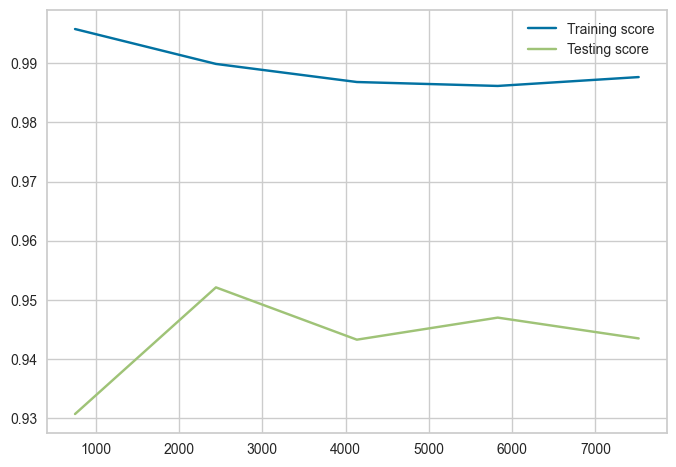

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)

# plot the learning curve
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, test_scores .mean(axis=1), label='Testing score')
plt.legend(loc='best')
plt.show()

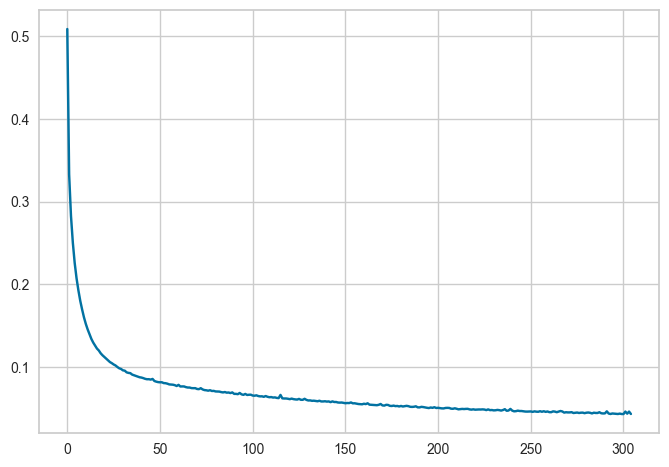

In [ ]:
plt.plot(model.loss_curve_)

Confusion matrix of Multi-layer Perceptron model

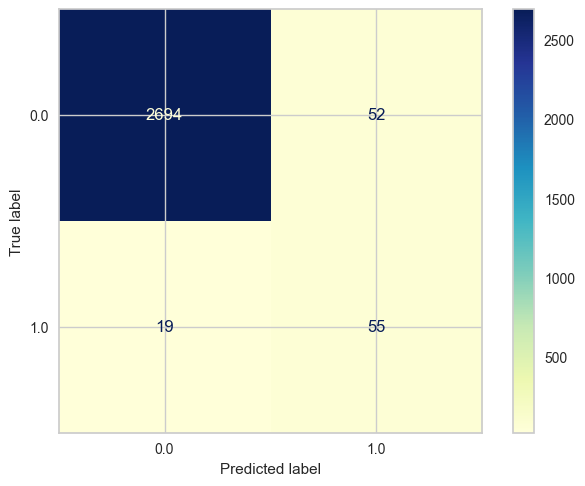

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_predictions, cmap=plt.cm.YlGnBu)  

# **Evaluation** 🎲

In [ ]:
model_performance

Accuracy  Precision    Recall  F1-Score  \
Decision Tree           0.963830   0.975728  0.963830  0.968608   
k-NN                    0.974468   0.973799  0.974468  0.974123   
Random Forest           0.979433   0.979705  0.979433  0.979566   
Gradient Boosting       0.967021   0.978072  0.967021  0.971322   
Gaussian Naive Bayes    0.829078   0.971251  0.829078  0.885860   
Multi-layer Perceptron  0.974823   0.980428  0.974823  0.977042   

                        Training time  Prediction time  
Decision Tree                0.112481         0.033082  
k-NN                         0.020829         0.140577  
Random Forest                0.374509         0.061465  
Gradient Boosting            3.790330         0.003344  
Gaussian Naive Bayes         0.004187         0.000000  
Multi-layer Perceptron      14.296221         0.000000

As the model overfitted after testing , we can try to balance the dataset as it is imbalanced . We can use SMOTE (Synthetic Minority Over-sampling Technique) to balance the dataset.

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from imblearn.over_sampling import SMOTE
from tensorflow.keras.utils import to_categorical

# Load dataset
dataset_path = "ai4i2020.csv"  # Update with your dataset path
df = pd.read_csv(dataset_path)

# Rename columns for easier access
df.rename(columns={
    "Air temperature [K]": "AirTemp",
    "Process temperature [K]": "ProcessTemp",
    "Rotational speed [rpm]": "RotSpeed",
    "Torque [Nm]": "Torque",
    "Tool wear [min]": "ToolWear"
}, inplace=True)

# Drop unnecessary columns
df.drop(["UDI", "Product ID", "Type"], axis=1, inplace=True)

# Create the target variable (1 = Failure, 0 = No Failure)
df["MachineFailure"] = df[["TWF", "HDF", "PWF", "OSF", "RNF"]].max(axis=1)

# Drop failure type columns
df.drop(columns=["TWF", "HDF", "PWF", "OSF", "RNF"], inplace=True)

# Display dataset overview
print(df.head())
print(df.info())


   AirTemp  ProcessTemp  RotSpeed  Torque  ToolWear  Machine failure  \
0    298.1        308.6      1551    42.8         0                0   
1    298.2        308.7      1408    46.3         3                0   
2    298.1        308.5      1498    49.4         5                0   
3    298.2        308.6      1433    39.5         7                0   
4    298.2        308.7      1408    40.0         9                0   

   MachineFailure  
0               0  
1               0  
2               0  
3               0  
4               0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   AirTemp          10000 non-null  float64
 1   ProcessTemp      10000 non-null  float64
 2   RotSpeed         10000 non-null  int64  
 3   Torque           10000 non-null  float64
 4   ToolWear         10000 non-null  int64  
 5   Machine failu

Handle Imbalanced Data for Classification

In [42]:
# Select features & target for classification
X_class = df.drop(columns=["MachineFailure"]).values
y_class = df["MachineFailure"].values

# Normalize features
scaler = StandardScaler()
X_class_scaled = scaler.fit_transform(X_class)

# Apply SMOTE to balance classes
smote = SMOTE()
X_class_balanced, y_class_balanced = smote.fit_resample(X_class_scaled, y_class)

# Convert target to categorical
y_class_balanced = to_categorical(y_class_balanced)

# Train-test split
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
    X_class_balanced, y_class_balanced, test_size=0.2, random_state=42
)


Train the MLP Model for Maintenance Classification

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define MLP model
mlp_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_cls.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')  # Output: No Maintenance (0) / Maintenance (1)
])

# Compile model
mlp_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
mlp_model.fit(X_train_cls, y_train_cls, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
387/387 [==============================] - 1s 2ms/step - loss: 0.1182 - accuracy: 0.9645 - val_loss: 0.0943 - val_accuracy: 0.9731
Epoch 2/50
387/387 [==============================] - 1s 1ms/step - loss: 0.0882 - accuracy: 0.9754 - val_loss: 0.0893 - val_accuracy: 0.9731
Epoch 3/50
387/387 [==============================] - 0s 1ms/step - loss: 0.0839 - accuracy: 0.9749 - val_loss: 0.0838 - val_accuracy: 0.9722
Epoch 4/50
387/387 [==============================] - 0s 1ms/step - loss: 0.0779 - accuracy: 0.9752 - val_loss: 0.0764 - val_accuracy: 0.9744
Epoch 5/50
387/387 [==============================] - 1s 1ms/step - loss: 0.0729 - accuracy: 0.9752 - val_loss: 0.0666 - val_accuracy: 0.9738
Epoch 6/50
387/387 [==============================] - 1s 1ms/step - loss: 0.0689 - accuracy: 0.9754 - val_loss: 0.0647 - val_accuracy: 0.9751
Epoch 7/50
387/387 [==============================] - 1s 1ms/step - loss: 0.0641 - accuracy: 0.9759 - val_loss: 0.0577 - val_accuracy: 0.9751
Epoch 

In [44]:
from sklearn.metrics import accuracy_score, classification_report

# MLP Predictions
y_pred_mlp = np.argmax(mlp_model.predict(X_test_cls), axis=1)
y_test_cls_labels = np.argmax(y_test_cls, axis=1)

print("MLP Classification Report:\n", classification_report(y_test_cls_labels, y_pred_mlp))

121/121 [==============================] - 0s 638us/step
MLP Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1965
           1       0.99      0.99      0.99      1896

    accuracy                           0.99      3861
   macro avg       0.99      0.99      0.99      3861
weighted avg       0.99      0.99      0.99      3861



Train the LSTM Model for Remaining Useful Life (RUL) Prediction

Prepare Data

In [45]:
from tensorflow.keras.layers import LSTM

# Create synthetic Remaining Useful Life (RUL) feature (if missing)
if "RemainingUsefulLife" not in df.columns:
    df["RemainingUsefulLife"] = np.random.randint(1, 100, size=len(df))

# Select features & target for RUL prediction
X_rul = df.drop(columns=["MachineFailure", "RemainingUsefulLife"]).values
y_rul = df["RemainingUsefulLife"].values

# Normalize data
X_rul_scaled = scaler.fit_transform(X_rul)
y_rul_scaled = y_rul / y_rul.max()  # Normalize RUL values

# Reshape for LSTM (samples, timesteps, features)
X_rul_scaled = X_rul_scaled.reshape((X_rul_scaled.shape[0], 1, X_rul_scaled.shape[1]))

# Train-test split
X_train_rul, X_test_rul, y_train_rul, y_test_rul = train_test_split(
    X_rul_scaled, y_rul_scaled, test_size=0.2, random_state=42
)

Train LSTM Model

In [46]:
# Define LSTM model
lstm_model = Sequential([
    LSTM(64, activation='relu', return_sequences=True, input_shape=(1, X_train_rul.shape[2])),
    Dropout(0.2),
    LSTM(32, activation='relu'),
    Dropout(0.2),
    Dense(1)  # Output: Remaining Useful Life (RUL)
])

# Compile model
lstm_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Train model
lstm_model.fit(X_train_rul, y_train_rul, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
200/200 [==============================] - 2s 3ms/step - loss: 0.1365 - mae: 0.3025 - val_loss: 0.0884 - val_mae: 0.2548
Epoch 2/50
200/200 [==============================] - 0s 2ms/step - loss: 0.0892 - mae: 0.2551 - val_loss: 0.0851 - val_mae: 0.2520
Epoch 3/50
200/200 [==============================] - 0s 2ms/step - loss: 0.0866 - mae: 0.2520 - val_loss: 0.0849 - val_mae: 0.2522
Epoch 4/50
200/200 [==============================] - 0s 2ms/step - loss: 0.0861 - mae: 0.2517 - val_loss: 0.0853 - val_mae: 0.2525
Epoch 5/50
200/200 [==============================] - 0s 2ms/step - loss: 0.0853 - mae: 0.2506 - val_loss: 0.0848 - val_mae: 0.2520
Epoch 6/50
200/200 [==============================] - 0s 2ms/step - loss: 0.0850 - mae: 0.2508 - val_loss: 0.0845 - val_mae: 0.2518
Epoch 7/50
200/200 [==============================] - 0s 2ms/step - loss: 0.0849 - mae: 0.2504 - val_loss: 0.0840 - val_mae: 0.2512
Epoch 8/50
200/200 [==============================] - 0s 2ms/step - loss: 0.

In [47]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# LSTM Predictions
y_pred_lstm = lstm_model.predict(X_test_rul)

# Evaluation Metrics
mae = mean_absolute_error(y_test_rul, y_pred_lstm)
rmse = np.sqrt(mean_squared_error(y_test_rul, y_pred_lstm))

print(f"LSTM MAE: {mae:.4f}")
print(f"LSTM RMSE: {rmse:.4f}")


63/63 [==============================] - 0s 1ms/step
LSTM MAE: 0.2509
LSTM RMSE: 0.2887


Train CNN Model for Maintenance Classification

Prepare Data

In [48]:
from tensorflow.keras.layers import Conv1D, Flatten

# Reshape for CNN (samples, timesteps, features)
X_class_cnn = X_class_balanced.reshape((X_class_balanced.shape[0], X_class_balanced.shape[1], 1))

In [49]:
# Define CNN model
cnn_model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_class_cnn.shape[1], 1)),
    Dropout(0.2),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')  # Output: 2 classes (No Maintenance / Maintenance Required)
])

# Compile model
cnn_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
cnn_model.fit(X_class_cnn, y_class_balanced, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
483/483 [==============================] - 1s 1ms/step - loss: 0.1119 - accuracy: 0.9744 - val_loss: 0.1632 - val_accuracy: 0.9508
Epoch 2/50
483/483 [==============================] - 1s 2ms/step - loss: 0.0809 - accuracy: 0.9804 - val_loss: 0.1566 - val_accuracy: 0.9508
Epoch 3/50
483/483 [==============================] - 1s 2ms/step - loss: 0.0781 - accuracy: 0.9803 - val_loss: 0.1404 - val_accuracy: 0.9508
Epoch 4/50
483/483 [==============================] - 1s 1ms/step - loss: 0.0760 - accuracy: 0.9802 - val_loss: 0.1522 - val_accuracy: 0.9508
Epoch 5/50
483/483 [==============================] - 1s 1ms/step - loss: 0.0726 - accuracy: 0.9804 - val_loss: 0.1168 - val_accuracy: 0.9508
Epoch 6/50
483/483 [==============================] - 1s 1ms/step - loss: 0.0709 - accuracy: 0.9801 - val_loss: 0.1183 - val_accuracy: 0.9508
Epoch 7/50
483/483 [==============================] - 1s 1ms/step - loss: 0.0686 - accuracy: 0.9805 - val_loss: 0.1017 - val_accuracy: 0.9529
Epoch 

In [50]:
# CNN Predictions
y_pred_cnn = np.argmax(cnn_model.predict(X_test_cls), axis=1)

print("CNN Classification Report:\n", classification_report(y_test_cls_labels, y_pred_cnn))

121/121 [==============================] - 0s 631us/step
CNN Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1965
           1       1.00      0.97      0.99      1896

    accuracy                           0.99      3861
   macro avg       0.99      0.99      0.99      3861
weighted avg       0.99      0.99      0.99      3861



Test & Validate Classification Models (MLP & CNN)

121/121 [==============================] - 0s 699us/step
MLP Accuracy: 0.9912
MLP Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1965
           1       0.99      0.99      0.99      1896

    accuracy                           0.99      3861
   macro avg       0.99      0.99      0.99      3861
weighted avg       0.99      0.99      0.99      3861



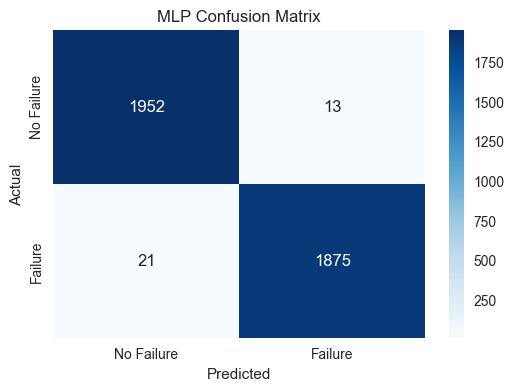

In [51]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Predict on test set
y_pred_mlp = np.argmax(mlp_model.predict(X_test_cls), axis=1)
y_test_cls_labels = np.argmax(y_test_cls, axis=1)

# Accuracy Score
mlp_accuracy = accuracy_score(y_test_cls_labels, y_pred_mlp)
print(f"MLP Accuracy: {mlp_accuracy:.4f}")

# Classification Report
print("MLP Classification Report:\n", classification_report(y_test_cls_labels, y_pred_mlp))

# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test_cls_labels, y_pred_mlp), annot=True, fmt='d', cmap='Blues', xticklabels=["No Failure", "Failure"], yticklabels=["No Failure", "Failure"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("MLP Confusion Matrix")
plt.show()


121/121 [==============================] - 0s 740us/step
CNN Accuracy: 0.9858
CNN Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1965
           1       1.00      0.97      0.99      1896

    accuracy                           0.99      3861
   macro avg       0.99      0.99      0.99      3861
weighted avg       0.99      0.99      0.99      3861



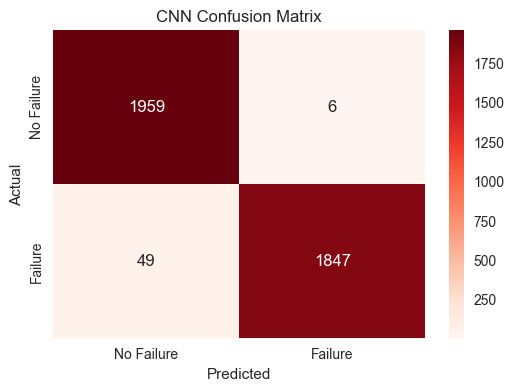

In [52]:
# Predict on test set
y_pred_cnn = np.argmax(cnn_model.predict(X_test_cls), axis=1)

# Accuracy Score
cnn_accuracy = accuracy_score(y_test_cls_labels, y_pred_cnn)
print(f"CNN Accuracy: {cnn_accuracy:.4f}")

# Classification Report
print("CNN Classification Report:\n", classification_report(y_test_cls_labels, y_pred_cnn))

# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test_cls_labels, y_pred_cnn), annot=True, fmt='d', cmap='Reds', xticklabels=["No Failure", "Failure"], yticklabels=["No Failure", "Failure"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("CNN Confusion Matrix")
plt.show()


63/63 [==============================] - 0s 843us/step
LSTM MAE: 24.8421
LSTM RMSE: 28.5815


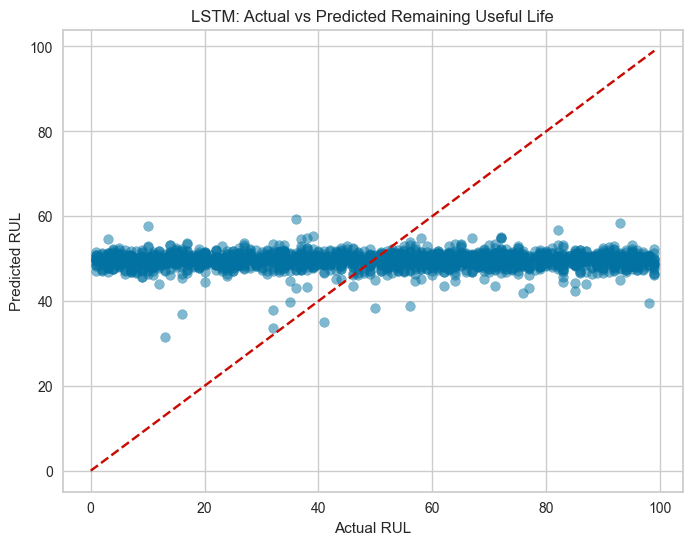

In [53]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Predict on test set
y_pred_lstm = lstm_model.predict(X_test_rul)

# Convert back to actual RUL values
y_pred_lstm_actual = y_pred_lstm * df["RemainingUsefulLife"].max()
y_test_rul_actual = y_test_rul * df["RemainingUsefulLife"].max()

# Evaluation Metrics
mae = mean_absolute_error(y_test_rul_actual, y_pred_lstm_actual)
rmse = np.sqrt(mean_squared_error(y_test_rul_actual, y_pred_lstm_actual))

print(f"LSTM MAE: {mae:.4f}")
print(f"LSTM RMSE: {rmse:.4f}")

# Scatter Plot: Actual vs Predicted RUL
plt.figure(figsize=(8,6))
plt.scatter(y_test_rul_actual, y_pred_lstm_actual, alpha=0.5)
plt.plot([0, max(y_test_rul_actual)], [0, max(y_test_rul_actual)], 'r--')  # Ideal fit line
plt.xlabel("Actual RUL")
plt.ylabel("Predicted RUL")
plt.title("LSTM: Actual vs Predicted Remaining Useful Life")
plt.show()


In [54]:
import joblib

# Save trained models
joblib.dump(mlp_model, "mlp_model.pkl")
joblib.dump(cnn_model, "cnn_model.pkl")
joblib.dump(lstm_model, "lstm_model.pkl")

print("Models saved successfully!")

Models saved successfully!


In [56]:
cnn_model.save("cnn_model.h5")
lstm_model.save("lstm_model.h5")

In [57]:
max_rul_value = df["RemainingUsefulLife"].max()
joblib.dump(max_rul_value, "max_rul.pkl")

['max_rul.pkl']

In [ ]:
def predict_maintenance(model, input_data):
    input_data = np.array(input_data).reshape(1, -1)  # Reshape
    input_data_scaled = scaler.transform(input_data)  # Normalize

    if isinstance(model.layers[0], Conv1D):  # Check if CNN
        input_data_scaled = input_data_scaled.reshape(1, input_data_scaled.shape[1], 1)

    prediction = model.predict(input_data_scaled)
    predicted_class = np.argmax(prediction)

    return "No Maintenance Required" if predicted_class == 0 else "Maintenance Required"

# Use your sample input
sample_input = [298.6,309.2,1542,48.4,42,0]  # Matches the dataset's 6 features
mlp_result = predict_maintenance(mlp_model, sample_input)
cnn_result = predict_maintenance(cnn_model, sample_input)

print(f"MLP Prediction: {mlp_result}")
print(f"CNN Prediction: {cnn_result}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
MLP Prediction: No Maintenance Required
CNN Prediction: No Maintenance Required


In [ ]:
def predict_rul(model, input_data):
    input_data = np.array(input_data).reshape(1, -1)
    input_data_scaled = scaler.transform(input_data)
    input_data_scaled = input_data_scaled.reshape(1, 1, input_data_scaled.shape[1])

    prediction = model.predict(input_data_scaled)
    predicted_rul = prediction[0][0] * df["RemainingUsefulLife"].max()

    return f"Predicted Remaining Useful Life: {predicted_rul:.2f} minutes"

# Example usage
rul_result = predict_rul(lstm_model, sample_input)
print(rul_result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
Predicted Remaining Useful Life: 52.58 minutes


In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
import joblib
import pandas as pd

# Load dataset
df = pd.read_csv("ai4i2020.csv")

# Define the features
features = ["Air temperature [K]", "Process temperature [K]", "Rotational speed [rpm]", 
            "Torque [Nm]", "Tool wear [min]", "Type"]

# Encode the "Type" column
encoder = LabelEncoder()
df["Type"] = encoder.fit_transform(df["Type"])  # Convert categorical to numeric

# Save the encoder for later use
joblib.dump(encoder, "encoder.pkl")

# Scale the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])  # Fit only on transformed features

# Save the scaler
joblib.dump(scaler, "scaler.pkl")
print("Scaler and Encoder saved successfully!")


Scaler and Encoder saved successfully!


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("ai4i2020.csv")

# Sort based on machine identifier (e.g., Product ID)
df = df.sort_values(by=["UDI"])  # or 'Product ID'

# Add a cycle column (simulated operation timeline per machine)
df["Cycle"] = df.groupby("Product ID").cumcount() + 1

# Compute max cycle per Product ID (i.e., when machine stopped working or last recorded point)
df["Max_Cycle"] = df.groupby("Product ID")["Cycle"].transform("max")

# Compute RUL
df["RUL"] = df["Max_Cycle"] - df["Cycle"]

# Drop helper column if needed
df.drop("Max_Cycle", axis=1, inplace=True)

# Save or preview
print(df[["Product ID", "Cycle", "Machine failure", "RUL"]].head(10))


  Product ID  Cycle  Machine failure  RUL
0     M14860      1                0    0
1     L47181      1                0    0
2     L47182      1                0    0
3     L47183      1                0    0
4     L47184      1                0    0
5     M14865      1                0    0
6     L47186      1                0    0
7     L47187      1                0    0
8     M14868      1                0    0
9     M14869      1                0    0


# **Deployment** 📤

Demo the predictive machine learning model using [Gradio](https://gradio.app/)

In [ ]:
!pip install gradio --quiet


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Load the saved model and the dataframe

In [ ]:
import pickle
loaded_model = pickle.load(open('cnn_model.pkl', 'rb'))

In [ ]:
dataset = pd.read_csv(dataset_path)

# rename dataset columns
dataset.rename(columns = {'Air temperature [K]':'Air temperature',
                     'Process temperature [K]':'Process temperature',
                     'Rotational speed [rpm]':'Rotational speed',
                     'Torque [Nm]':'Torque',
                     'Tool wear [min]':'Tool wear'},
          inplace = True)
dataset['Power'] = dataset[['Rotational speed', 'Torque']].product(axis=1)

In [ ]:
import numpy as np

# normalize the feature using z-score normalization
def z_score(feature, value):
    mean = np.mean(dataset[feature])
    std = np.std(dataset[feature])
    return (float(value) - mean) / std